<a href="https://colab.research.google.com/github/nav0203/Predictive-Modelling-Project/blob/main/Predictive_Modelling_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PREDICTIVE  MODELLING  PROJECT  PROJECT**

# **Problem 1: Linear Regression**

Problem Statement: You are a part of an investing firm and your work is to do
research about these 759 firms. You are provided with the dataset containing the
sales and other attributes of these 759 firms. Predict the sales of these firms on the
bases of the details given in the dataset so as to help your company in investing
consciously. Also, provide them with 5 attributes that are most important.

## **1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, data types, shape, EDA). Perform Univariate and Bivariate Analysis.**

In [ ]:
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Store the csv file path in a variable
path = "/content/drive/My Drive/Firm_level_data.csv"

In [ ]:
df=pd.read_csv(path)

In [ ]:
print(df)

     Unnamed: 0        sales      capital  patents        randd  employment  \
0             0   826.995050   161.603986       10   382.078247    2.306000   
1             1   407.753973   122.101012        2     0.000000    1.860000   
2             2  8407.845588  6221.144614      138  3296.700439   49.659005   
3             3   451.000010   266.899987        1    83.540161    3.071000   
4             4   174.927981   140.124004        2    14.233637    1.947000   
..          ...          ...          ...      ...          ...         ...   
754         754  1253.900196   708.299935       32   412.936157   22.100002   
755         755   171.821025    73.666008        1     0.037735    1.684000   
756         756   202.726967   123.926991       13    74.861099    1.460000   
757         757   785.687944   138.780992        6     0.621750    2.900000   
758         758    22.701999    14.244999        5    18.574360    0.197000   

    sp500     tobinq         value  institutions  


**Understanding the structure of data**

In [ ]:
df.head()

Unnamed: 0        sales      capital  patents        randd  employment  \
0           0   826.995050   161.603986       10   382.078247    2.306000   
1           1   407.753973   122.101012        2     0.000000    1.860000   
2           2  8407.845588  6221.144614      138  3296.700439   49.659005   
3           3   451.000010   266.899987        1    83.540161    3.071000   
4           4   174.927981   140.124004        2    14.233637    1.947000   

  sp500     tobinq         value  institutions  
0    no  11.049511   1625.453755         80.27  
1    no   0.844187    243.117082         59.02  
2   yes   5.205257  25865.233800         47.70  
3    no   0.305221     63.024630         26.88  
4    no   1.063300     67.406408         49.46

In [ ]:
df.tail()

Unnamed: 0        sales     capital  patents       randd  employment  \
754         754  1253.900196  708.299935       32  412.936157   22.100002   
755         755   171.821025   73.666008        1    0.037735    1.684000   
756         756   202.726967  123.926991       13   74.861099    1.460000   
757         757   785.687944  138.780992        6    0.621750    2.900000   
758         758    22.701999   14.244999        5   18.574360    0.197000   

    sp500    tobinq       value  institutions  
754   yes  0.697454  267.119487         33.50  
755    no       NaN  228.475701         46.41  
756    no  5.229723  580.430741         42.25  
757   yes  1.625398  309.938651         61.39  
758    no  2.213070   18.940140          7.50

In [ ]:
df.columns

Index(['Unnamed: 0', 'sales', 'capital', 'patents', 'randd', 'employment',
       'sp500', 'tobinq', 'value', 'institutions'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0        int64
sales           float64
capital         float64
patents           int64
randd           float64
employment      float64
sp500            object
tobinq          float64
value           float64
institutions    float64
dtype: object

In [ ]:
df.shape

(759, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    759 non-null    int64  
 1   sales         759 non-null    float64
 2   capital       759 non-null    float64
 3   patents       759 non-null    int64  
 4   randd         759 non-null    float64
 5   employment    759 non-null    float64
 6   sp500         759 non-null    object 
 7   tobinq        738 non-null    float64
 8   value         759 non-null    float64
 9   institutions  759 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 59.4+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0       0
sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
754    False
755    False
756    False
757    False
758    False
Length: 759, dtype: bool

**Explore descriptive statistics**

In [ ]:
df.describe().T

count         mean          std       min         25%  \
Unnamed: 0    759.0   379.000000   219.248717  0.000000  189.500000   
sales         759.0  2689.705158  8722.060124  0.138000  122.920000   
capital       759.0  1977.747498  6466.704896  0.057000   52.650501   
patents       759.0    25.831357    97.259577  0.000000    1.000000   
randd         759.0   439.938074  2007.397588  0.000000    4.628262   
employment    759.0    14.164519    43.321443  0.006000    0.927500   
tobinq        738.0     2.794910     3.366591  0.119001    1.018783   
value         759.0  2732.734750  7071.072362  1.971053  103.593946   
institutions  759.0    43.020540    21.685586  0.000000   25.395000   

                     50%          75%            max  
Unnamed: 0    379.000000   568.500000     758.000000  
sales         448.577082  1822.547366  135696.788200  
capital       202.179023  1075.790020   93625.200560  
patents         3.000000    11.500000    1220.000000  
randd          36.864136   143.253403   30425.255860  
employment      2.924000    10.050001     710.799925  
tobinq          1.680303     3.139309      20.000000  
value         410.793529  2054.160386   95191.591160  
institutions   44.110000    60.510000      90.150000

**Perform Univariate and Bivariate Analysis.**

In [ ]:
df2=df.replace({'yes':0,'no':1})
df2

Unnamed: 0        sales      capital  patents        randd  employment  \
0             0   826.995050   161.603986       10   382.078247    2.306000   
1             1   407.753973   122.101012        2     0.000000    1.860000   
2             2  8407.845588  6221.144614      138  3296.700439   49.659005   
3             3   451.000010   266.899987        1    83.540161    3.071000   
4             4   174.927981   140.124004        2    14.233637    1.947000   
..          ...          ...          ...      ...          ...         ...   
754         754  1253.900196   708.299935       32   412.936157   22.100002   
755         755   171.821025    73.666008        1     0.037735    1.684000   
756         756   202.726967   123.926991       13    74.861099    1.460000   
757         757   785.687944   138.780992        6     0.621750    2.900000   
758         758    22.701999    14.244999        5    18.574360    0.197000   

     sp500     tobinq         value  institutions  
0        1  11.049511   1625.453755         80.27  
1        1   0.844187    243.117082         59.02  
2        0   5.205257  25865.233800         47.70  
3        1   0.305221     63.024630         26.88  
4        1   1.063300     67.406408         49.46  
..     ...        ...           ...           ...  
754      0   0.697454    267.119487         33.50  
755      1        NaN    228.475701         46.41  
756      1   5.229723    580.430741         42.25  
757      0   1.625398    309.938651         61.39  
758      1   2.213070     18.940140          7.50  

[759 rows x 10 columns]

**now we can perform univaiate analysis**

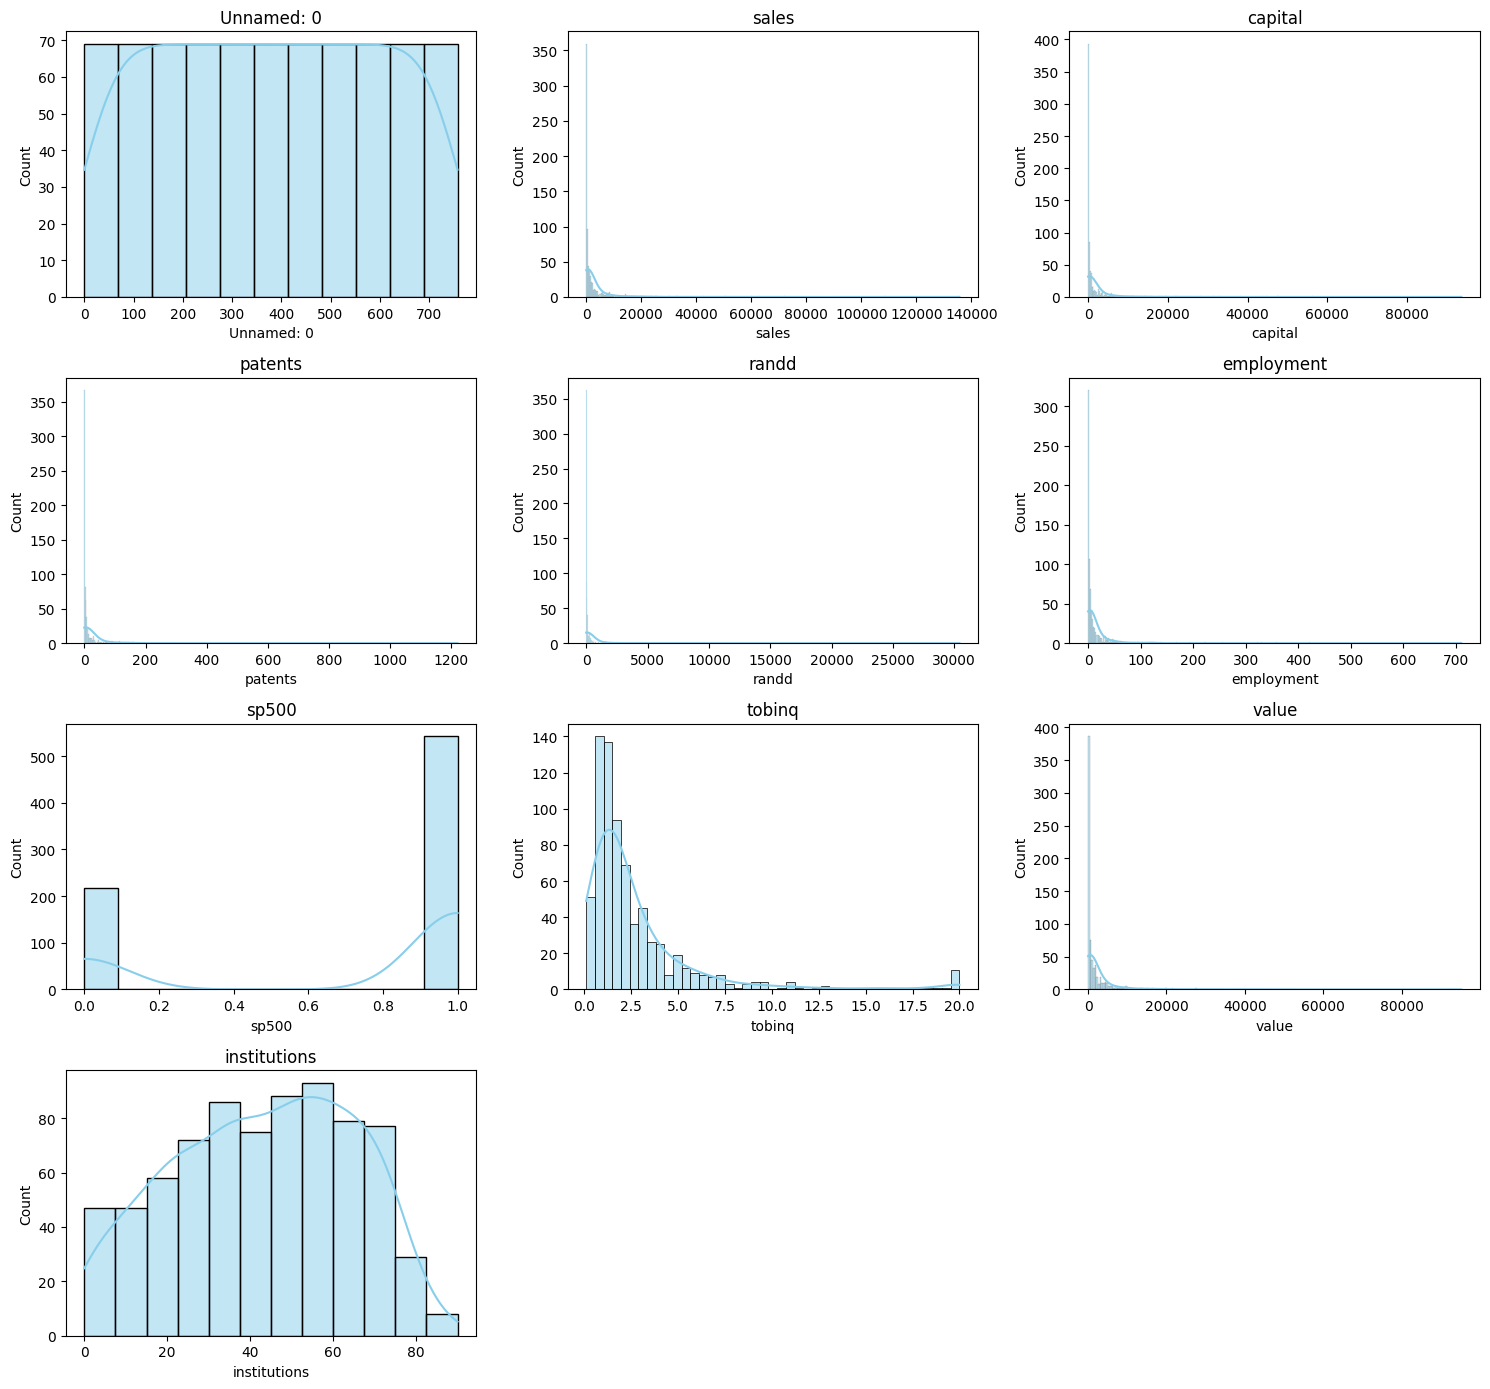

In [ ]:
## Creating histograms of all the columns to capture the distribution of each variable
plt.figure(figsize=(15, 14))
for i, col in enumerate(df2.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(df2[col], color='skyblue', kde = True)
    plt.title(col)
plt.tight_layout();

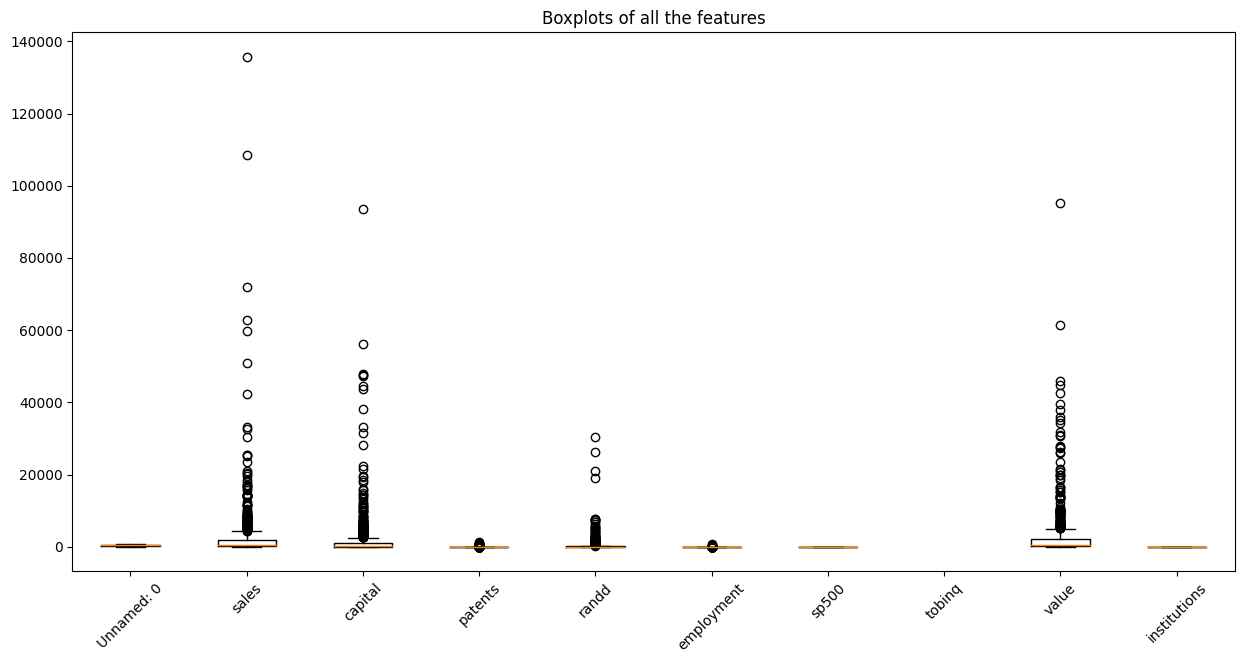

In [ ]:
## Boxplots of individual variables
plt.figure(figsize = (15,7))
plt.boxplot(df2.values, labels = df2.columns)
plt.title('Boxplots of all the features')
plt.xticks(rotation=45);

**the above boxplot shows large number of outliers so we can remove them by**

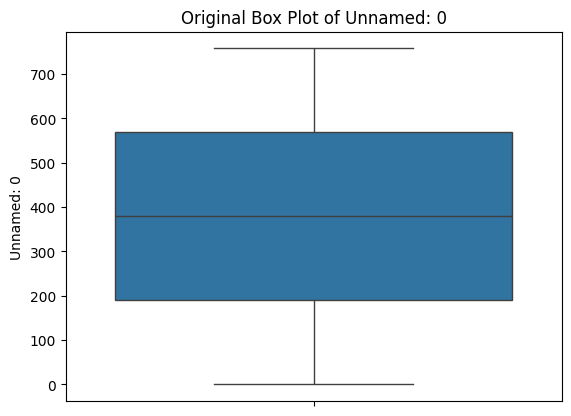

Threshold value for removing outliers in Unnamed: 0 : 1137.0


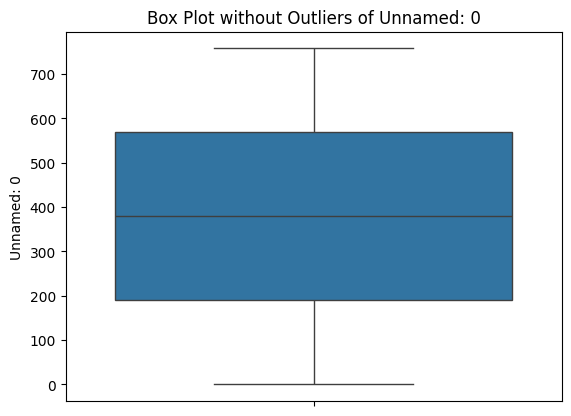

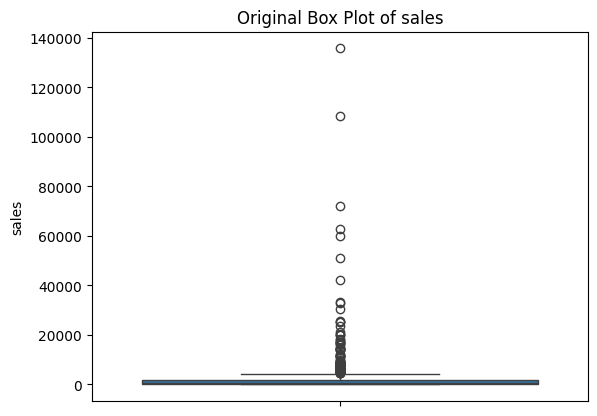

Threshold value for removing outliers in sales : 4371.988416175


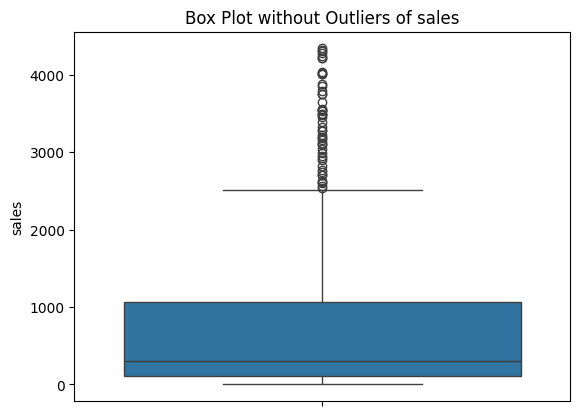

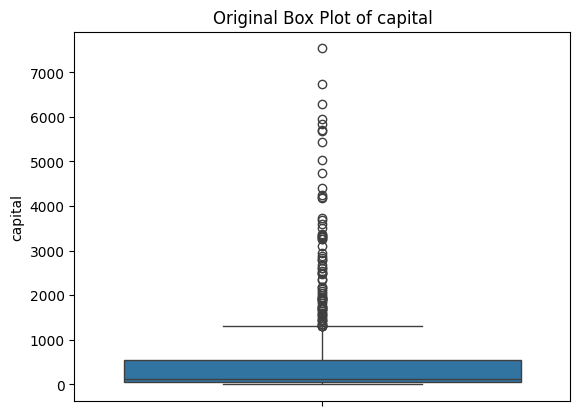

Threshold value for removing outliers in capital : 1315.539863735


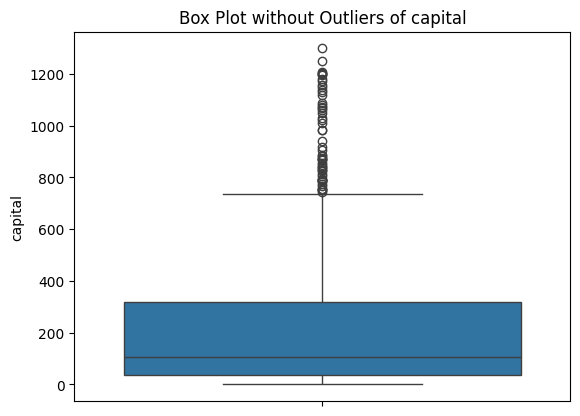

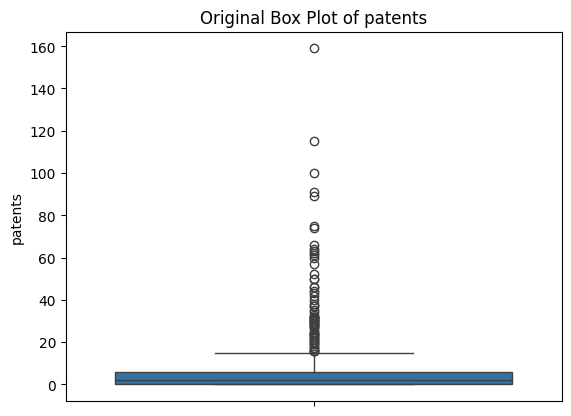

Threshold value for removing outliers in patents : 15.0


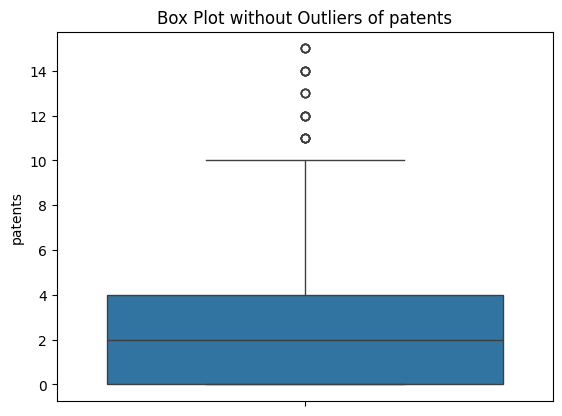

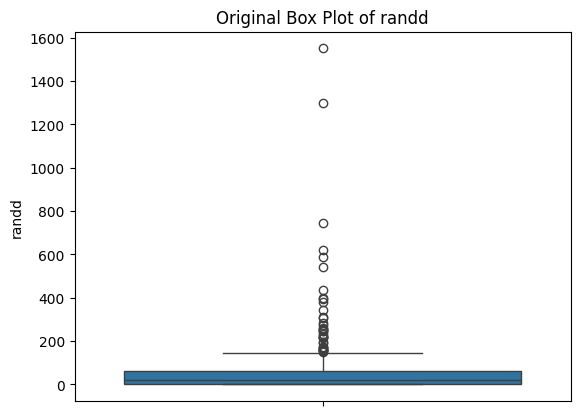

Threshold value for removing outliers in randd : 148.83671496475


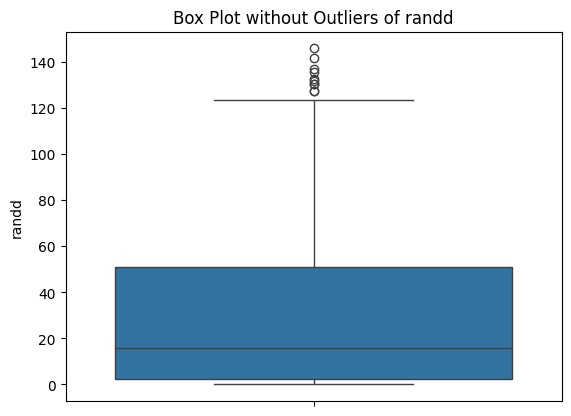

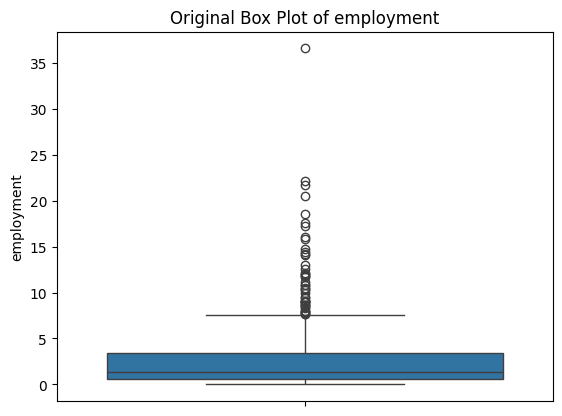

Threshold value for removing outliers in employment : 7.64499986525


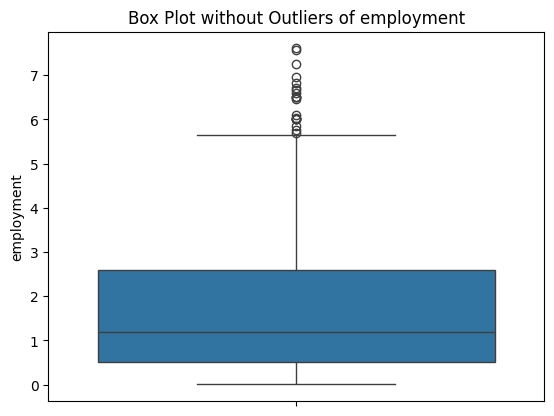

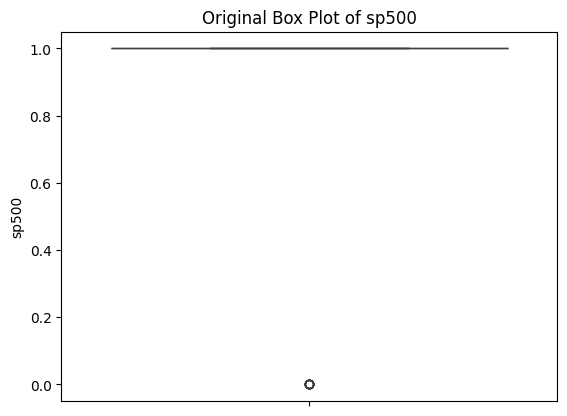

Threshold value for removing outliers in sp500 : 1.0


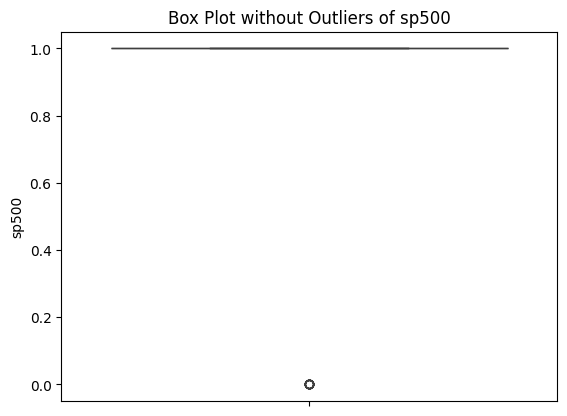

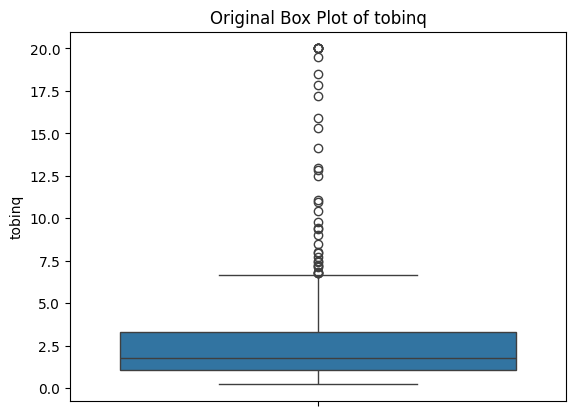

Threshold value for removing outliers in tobinq : 6.680432722874999


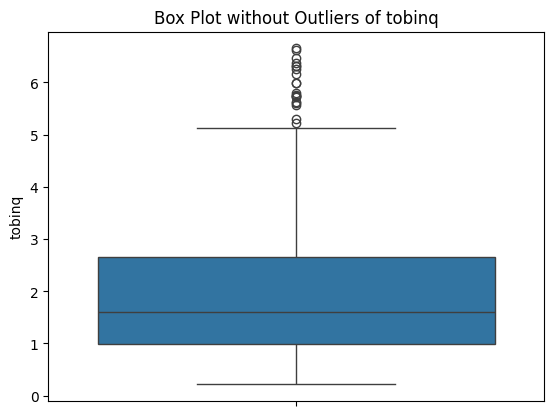

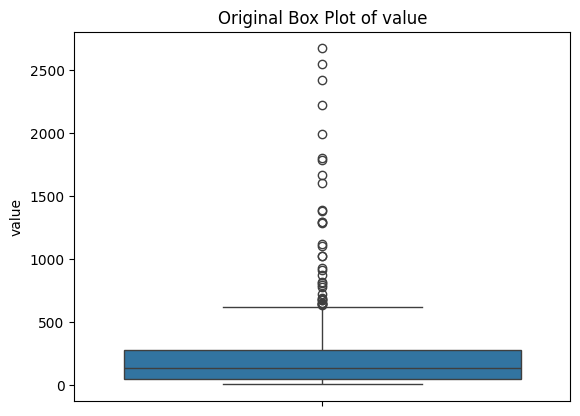

Threshold value for removing outliers in value : 616.698213165


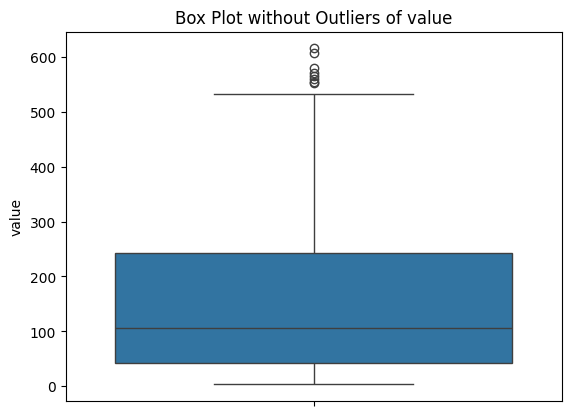

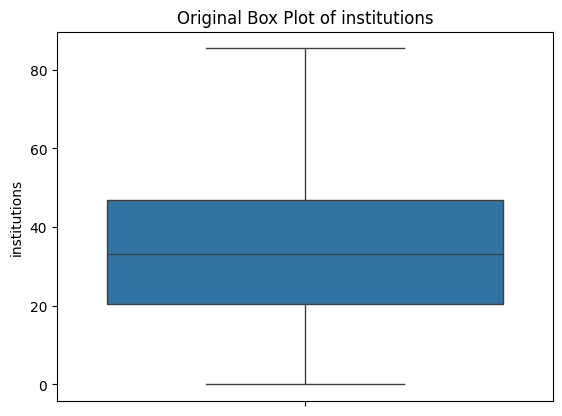

Threshold value for removing outliers in institutions : 86.74000000000001


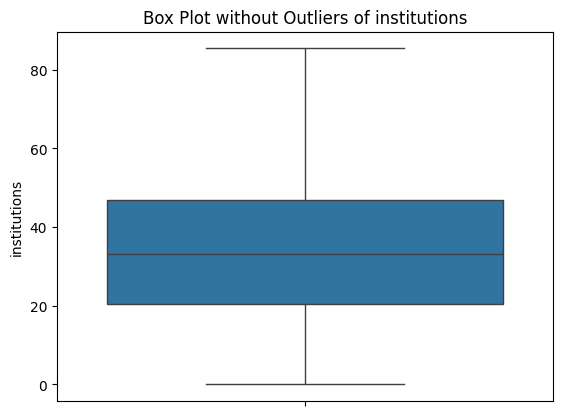

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def removal_box_plot(df2, columns):
    for column in columns:
        sns.boxplot(df2[column])
        plt.title(f'Original Box Plot of {column}')
        plt.show()

        Q1 = df2[column].quantile(0.25)
        Q3 = df2[column].quantile(0.75)
        IQR = Q3 - Q1

        threshold_value = Q3 + 1.5 * IQR  # Adjust multiplier as needed
        print("Threshold value for removing outliers in", column, ":", threshold_value)

        removed_outliers = df2[df2[column] <= threshold_value]

        sns.boxplot(removed_outliers[column])
        plt.title(f'Box Plot without Outliers of {column}')
        plt.show()

        df2 = removed_outliers  # Update DataFrame after removing outliers from each column

    return removed_outliers

# Specify the list of columns from which you want to remove outliers
columns_to_remove_outliers = ['Unnamed: 0', 'sales', 'capital','patents','randd','employment','sp500','tobinq','value','institutions']

no_outliers = removal_box_plot(df2, columns_to_remove_outliers)

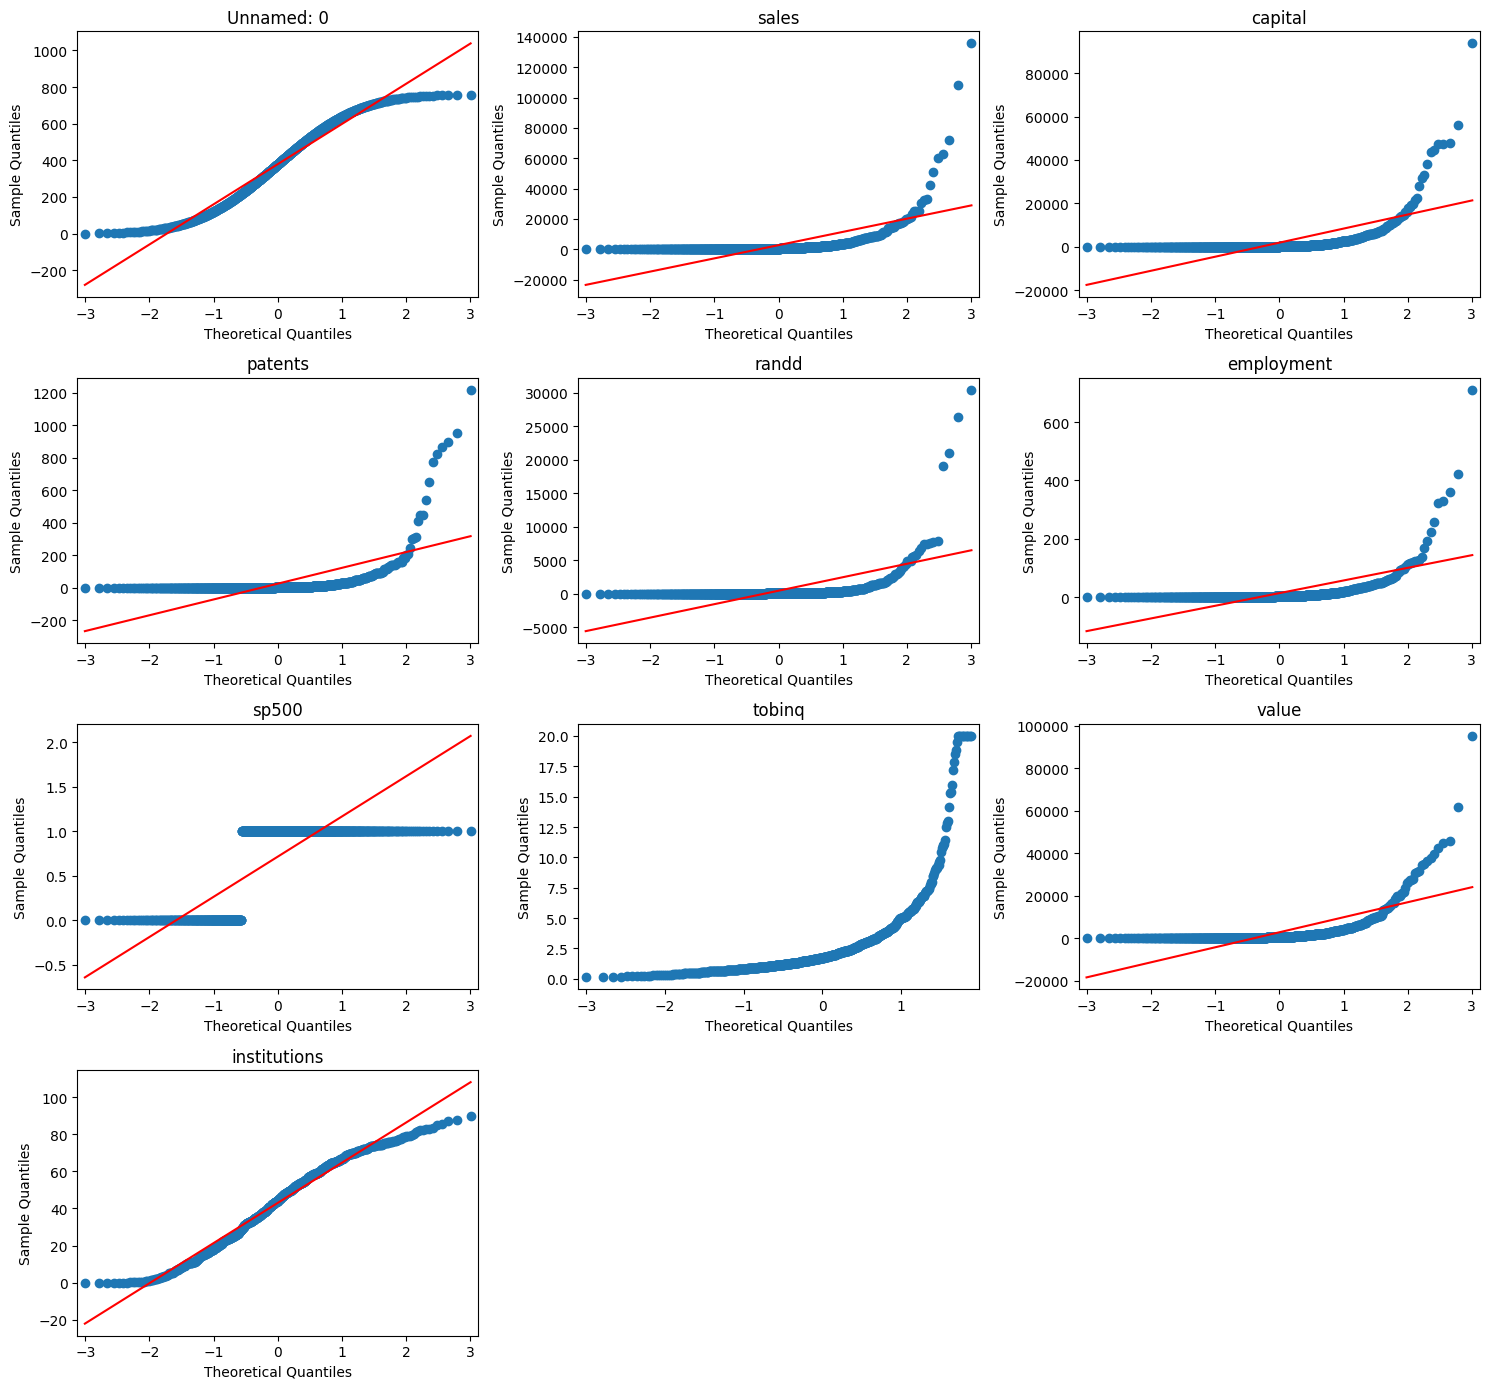

In [ ]:
## Q-Q plots
from statsmodels.api import qqplot
plt.figure(figsize=(15, 14))
for i, col in enumerate(df2.columns):
    plt.subplot(4, 3, i+1)
    qqplot(df2[col], line='s',ax=plt.gca())
    plt.title(col)
plt.tight_layout();

**Bivariate analysis**

In [ ]:
## Correlation Matrix
corr_matrix = df2.corr()
corr_matrix

Unnamed: 0     sales   capital   patents     randd  employment  \
Unnamed: 0      1.000000 -0.036664 -0.053245 -0.002615 -0.029014   -0.007481   
sales          -0.036664  1.000000  0.869595  0.682134  0.870113    0.908868   
capital        -0.053245  0.869595  1.000000  0.633339  0.770468    0.771263   
patents        -0.002615  0.682134  0.633339  1.000000  0.820497    0.626341   
randd          -0.029014  0.870113  0.770468  0.820497  1.000000    0.778005   
employment     -0.007481  0.908868  0.771263  0.626341  0.778005    1.000000   
sp500           0.046446 -0.366560 -0.368762 -0.296660 -0.260343   -0.380134   
tobinq         -0.030769 -0.113463 -0.130567 -0.049040 -0.058420   -0.113761   
value          -0.050574  0.713778  0.715893  0.619547  0.584937    0.668336   
institutions   -0.001778  0.116483  0.099160  0.127751  0.052570    0.144300   

                 sp500    tobinq     value  institutions  
Unnamed: 0    0.046446 -0.030769 -0.050574     -0.001778  
sales        -0.366560 -0.113463  0.713778      0.116483  
capital      -0.368762 -0.130567  0.715893      0.099160  
patents      -0.296660 -0.049040  0.619547      0.127751  
randd        -0.260343 -0.058420  0.584937      0.052570  
employment   -0.380134 -0.113761  0.668336      0.144300  
sp500         1.000000  0.104111 -0.466242     -0.442653  
tobinq        0.104111  1.000000 -0.006137     -0.025241  
value        -0.466242 -0.006137  1.000000      0.138269  
institutions -0.442653 -0.025241  0.138269      1.000000

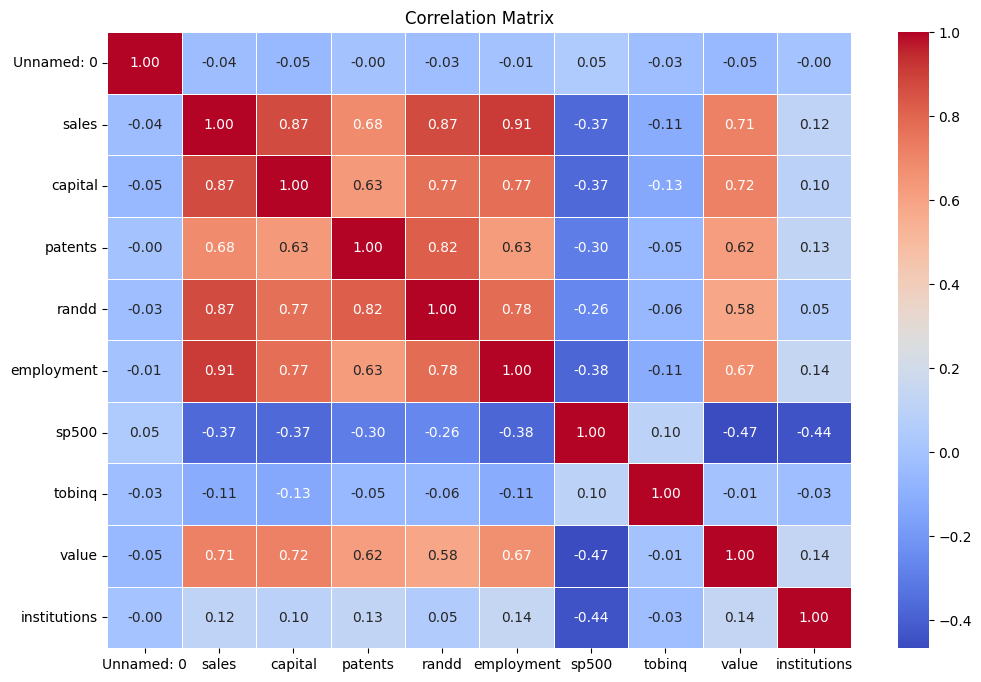

In [ ]:
## Heatmap of the above correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix');

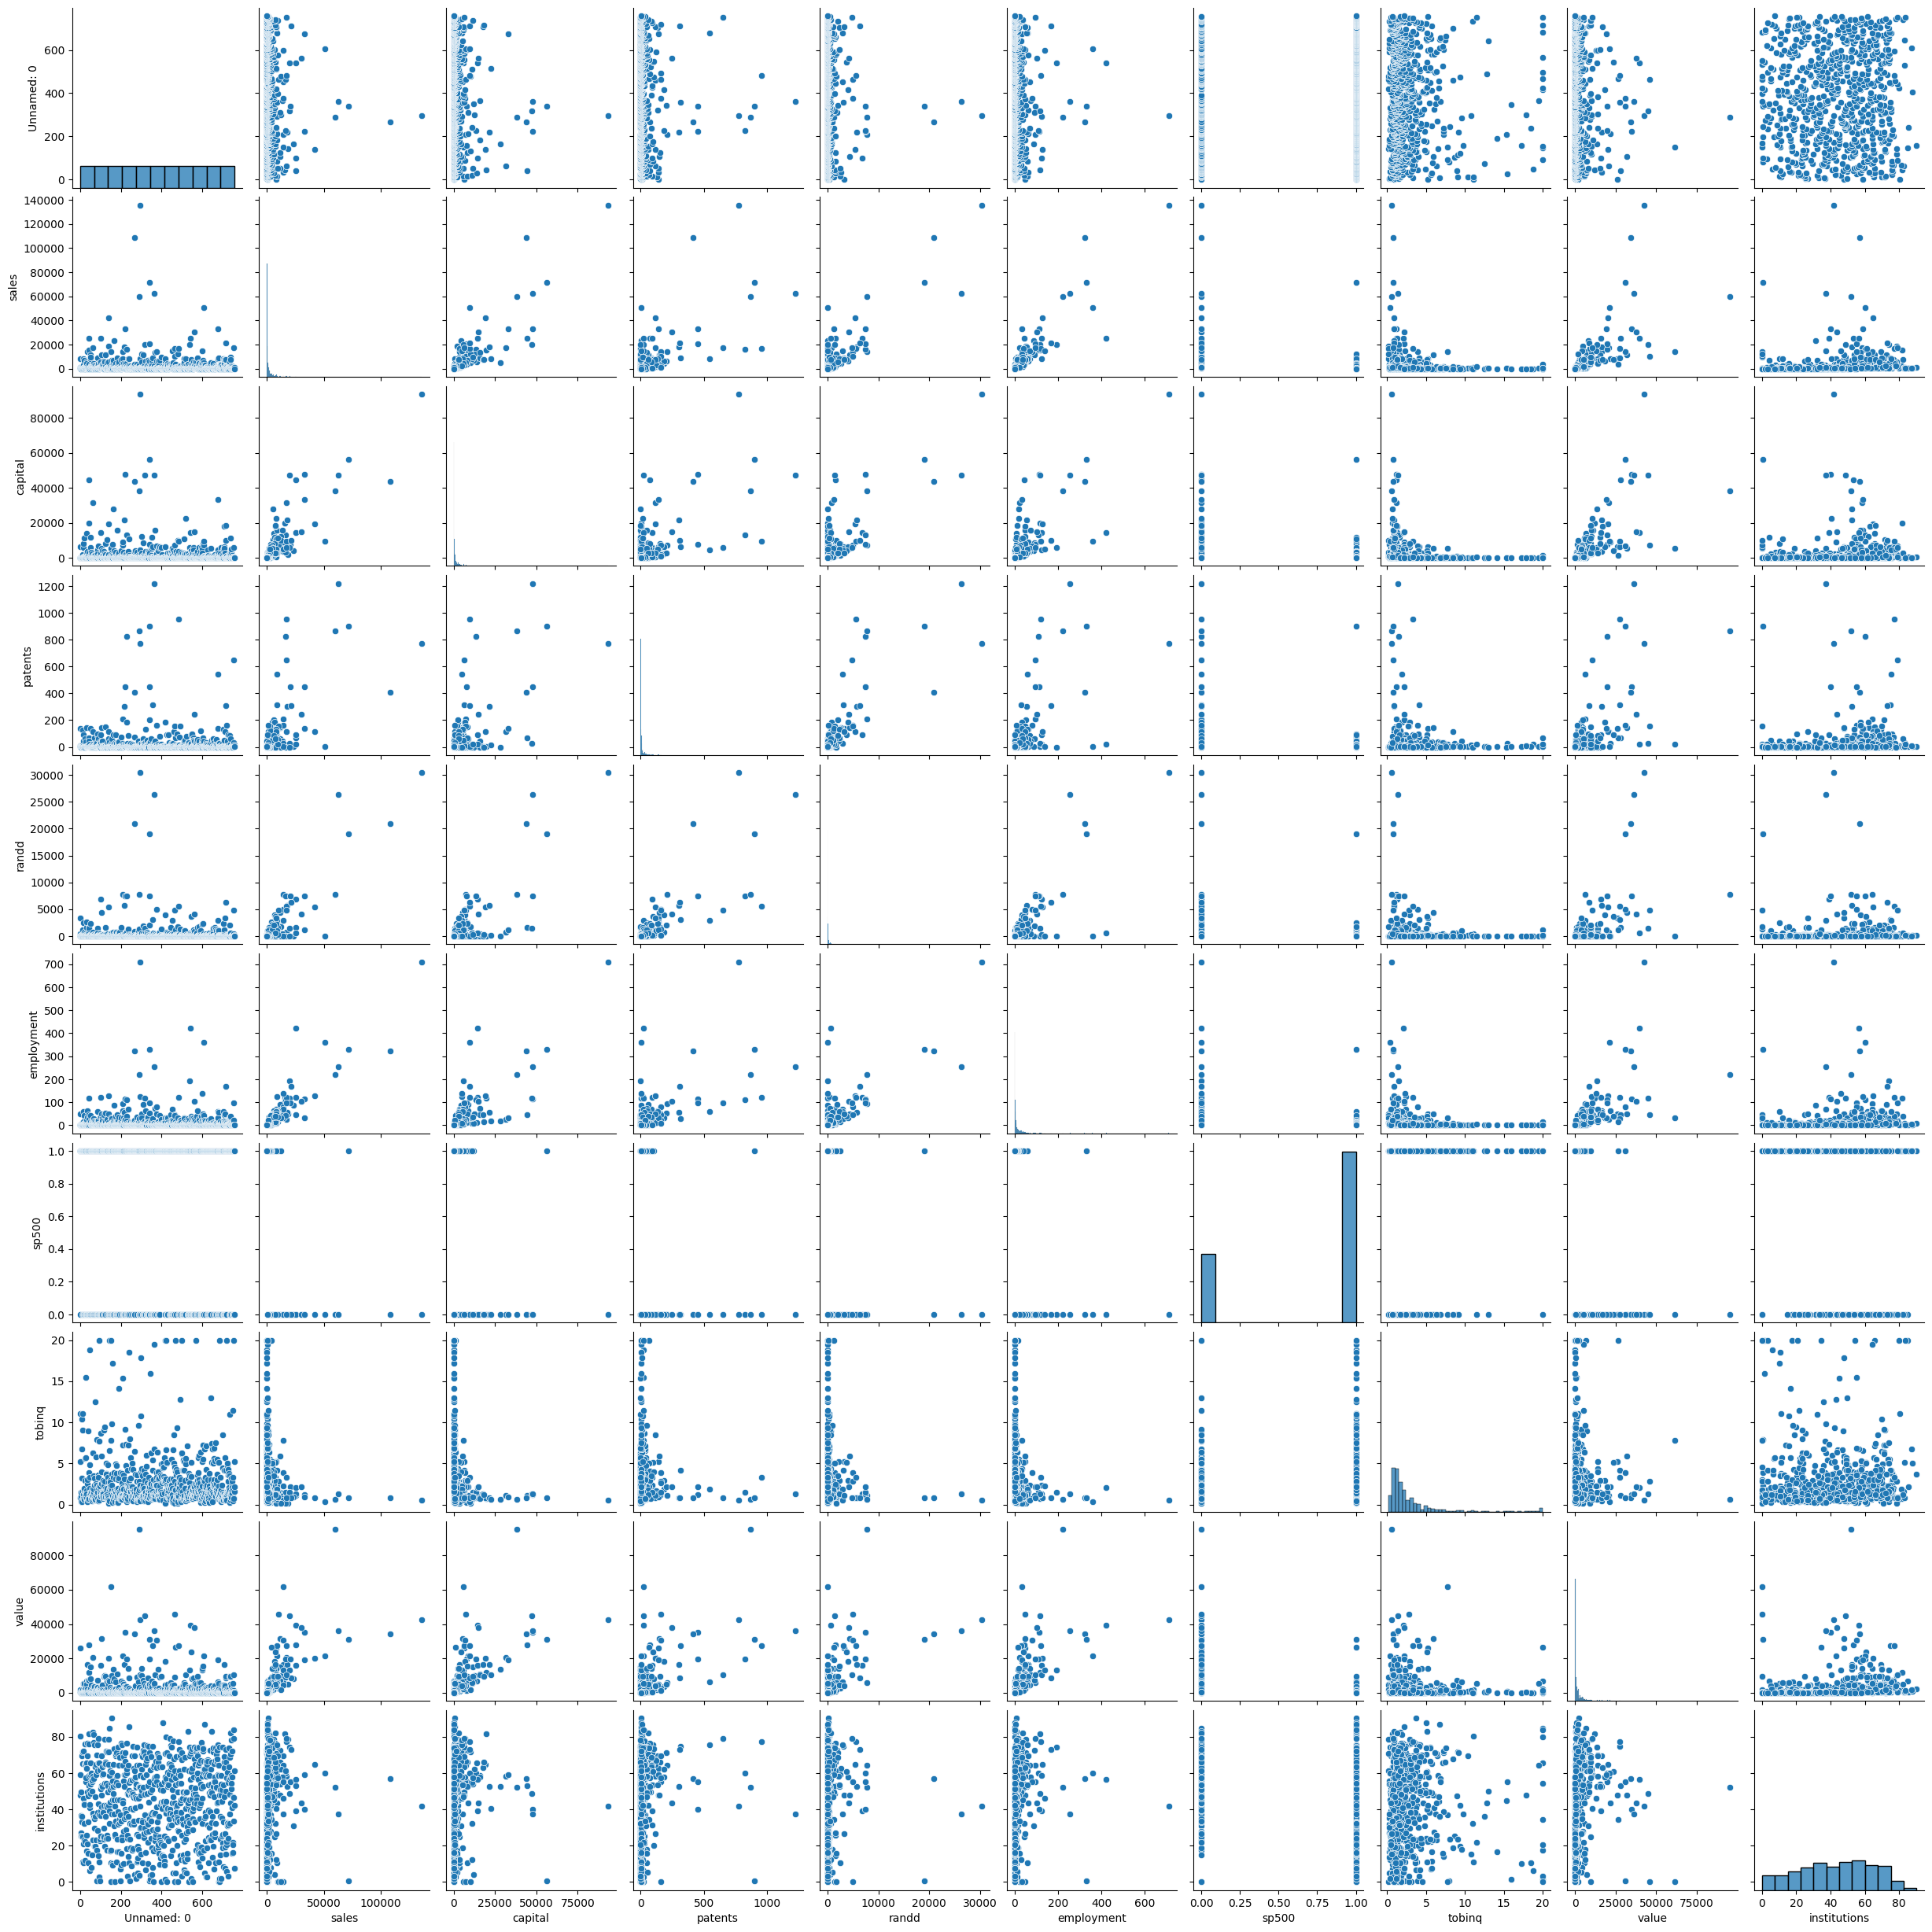

In [ ]:
## Scatter plot of the above variables
sns.pairplot(df2[['Unnamed: 0', 'sales', 'capital','patents','randd','employment','sp500','tobinq','value','institutions']]);

##**1.2 Impute null values if present? Do you think scaling is necessary in this case?**

In [ ]:
df2.isnull().sum()

Unnamed: 0       0
sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [ ]:
df2['tobinq']=df2['tobinq'].fillna(df2['tobinq']).mean()

In [ ]:
df2

Unnamed: 0        sales      capital  patents        randd  employment  \
0             0   826.995050   161.603986       10   382.078247    2.306000   
1             1   407.753973   122.101012        2     0.000000    1.860000   
2             2  8407.845588  6221.144614      138  3296.700439   49.659005   
3             3   451.000010   266.899987        1    83.540161    3.071000   
4             4   174.927981   140.124004        2    14.233637    1.947000   
..          ...          ...          ...      ...          ...         ...   
754         754  1253.900196   708.299935       32   412.936157   22.100002   
755         755   171.821025    73.666008        1     0.037735    1.684000   
756         756   202.726967   123.926991       13    74.861099    1.460000   
757         757   785.687944   138.780992        6     0.621750    2.900000   
758         758    22.701999    14.244999        5    18.574360    0.197000   

     sp500   tobinq         value  institutions  
0        1  2.79491   1625.453755         80.27  
1        1  2.79491    243.117082         59.02  
2        0  2.79491  25865.233800         47.70  
3        1  2.79491     63.024630         26.88  
4        1  2.79491     67.406408         49.46  
..     ...      ...           ...           ...  
754      0  2.79491    267.119487         33.50  
755      1  2.79491    228.475701         46.41  
756      1  2.79491    580.430741         42.25  
757      0  2.79491    309.938651         61.39  
758      1  2.79491     18.940140          7.50  

[759 rows x 10 columns]

In [ ]:
df2.isnull().sum()

Unnamed: 0      0
sales           0
capital         0
patents         0
randd           0
employment      0
sp500           0
tobinq          0
value           0
institutions    0
dtype: int64

In [ ]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df2[['Unnamed: 0', 'sales', 'capital','patents','randd','employment','sp500','tobinq','value','institutions']]


print(X)

     Unnamed: 0        sales      capital  patents        randd  employment  \
0             0   826.995050   161.603986       10   382.078247    2.306000   
1             1   407.753973   122.101012        2     0.000000    1.860000   
2             2  8407.845588  6221.144614      138  3296.700439   49.659005   
3             3   451.000010   266.899987        1    83.540161    3.071000   
4             4   174.927981   140.124004        2    14.233637    1.947000   
..          ...          ...          ...      ...          ...         ...   
754         754  1253.900196   708.299935       32   412.936157   22.100002   
755         755   171.821025    73.666008        1     0.037735    1.684000   
756         756   202.726967   123.926991       13    74.861099    1.460000   
757         757   785.687944   138.780992        6     0.621750    2.900000   
758         758    22.701999    14.244999        5    18.574360    0.197000   

     sp500   tobinq         value  institutions  
0

In [ ]:

scale = StandardScaler()

X = df2[['Unnamed: 0', 'sales', 'capital','patents','randd','employment','sp500','tobinq','value','institutions']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-1.72977029e+00 -2.13703916e-01 -2.81030468e-01 ... -8.88178420e-16
  -1.56696339e-01  1.71883858e+00]
 [-1.72520625e+00 -2.61802361e-01 -2.87143167e-01 ... -8.88178420e-16
  -3.52317050e-01  7.38278861e-01]
 [-1.72064222e+00  6.56027471e-01  6.56624252e-01 ... -8.88178420e-16
   3.27358451e+00  2.15928932e-01]
 ...
 [ 1.72064222e+00 -2.85324580e-01 -2.86860615e-01 ... -8.88178420e-16
  -3.04582269e-01 -3.55557960e-02]
 [ 1.72520625e+00 -2.18442973e-01 -2.84562103e-01 ... -8.88178420e-16
  -3.42860828e-01  8.47640110e-01]
 [ 1.72977029e+00 -3.05978379e-01 -3.03832831e-01 ... -8.88178420e-16
  -3.84041343e-01 -1.63905933e+00]]


Scaling is a preprocessing step used in machine learning to standardize or normalize the features of a dataset. It helps to bring all features to the same scale, which can be important for certain algorithms that are sensitive to the scale of the input features. Here's what scaling does to the raw data in a DataFrame:

Standardization: Scaling typically involves transforming the data so that it has a mean of 0 and a standard deviation of 1. This is often referred to as standardization or Z-score normalization. Each feature is transformed independently.

Normalization: Alternatively, scaling can involve transforming the data so that it falls within a specific range, such as [0, 1] or [-1, 1]. This is known as normalization or min-max scaling. Again, each feature is transformed independently.

The purpose of scaling is to ensure that features are comparable and have similar ranges of values. This can help improve the performance and stability of machine learning algorithms, particularly those that rely on distance calculations or optimization techniques. Some algorithms, such as support vector machines (SVM) and k-nearest neighbors (KNN), are particularly sensitive to the scale of the input features, so scaling is often recommended when using these algorithms.

In your code example, the StandardScaler from scikit-learn is used to standardize the features in the DataFrame X. This means that each feature will have a mean of 0 and a standard deviation of 1 after scaling. This can be useful for algorithms that assume Gaussian distributions or for algorithms that use regularization, such as linear regression or logistic regression.

In [ ]:
df2

Unnamed: 0        sales      capital  patents        randd  employment  \
0             0   826.995050   161.603986       10   382.078247    2.306000   
1             1   407.753973   122.101012        2     0.000000    1.860000   
2             2  8407.845588  6221.144614      138  3296.700439   49.659005   
3             3   451.000010   266.899987        1    83.540161    3.071000   
4             4   174.927981   140.124004        2    14.233637    1.947000   
..          ...          ...          ...      ...          ...         ...   
754         754  1253.900196   708.299935       32   412.936157   22.100002   
755         755   171.821025    73.666008        1     0.037735    1.684000   
756         756   202.726967   123.926991       13    74.861099    1.460000   
757         757   785.687944   138.780992        6     0.621750    2.900000   
758         758    22.701999    14.244999        5    18.574360    0.197000   

     sp500   tobinq         value  institutions  
0        1  2.79491   1625.453755         80.27  
1        1  2.79491    243.117082         59.02  
2        0  2.79491  25865.233800         47.70  
3        1  2.79491     63.024630         26.88  
4        1  2.79491     67.406408         49.46  
..     ...      ...           ...           ...  
754      0  2.79491    267.119487         33.50  
755      1  2.79491    228.475701         46.41  
756      1  2.79491    580.430741         42.25  
757      0  2.79491    309.938651         61.39  
758      1  2.79491     18.940140          7.50  

[759 rows x 10 columns]

## **1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.**

In [ ]:
# import modules
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split




In [ ]:
y = df2.iloc[:, 1].values

In [ ]:
y

array([8.26995050e+02, 4.07753973e+02, 8.40784559e+03, 4.51000010e+02,
       1.74927981e+02, 7.58120012e+01, 5.23389972e+01, 8.71680037e+01,
       2.95288967e+02, 1.56946033e+02, 3.72245032e+02, 3.66117944e+02,
       6.15500022e+00, 1.64827966e+03, 2.63099964e+01, 3.32770065e+03,
       8.50557554e+03, 5.55086911e+02, 5.08549998e+01, 1.14798991e+03,
       7.23199726e+03, 1.10018689e+03, 2.64780016e+01, 8.58899937e+02,
       2.36999984e+00, 7.75328965e+02, 2.17987985e+02, 1.40279036e+02,
       2.19830981e+02, 2.22642991e+02, 1.68053181e+03, 5.85158615e+03,
       1.03960996e+02, 4.27680263e+03, 1.41730057e+04, 1.30920017e+02,
       1.76996396e+03, 5.38534081e+02, 5.08580069e+01, 1.11820012e+01,
       4.53356898e+02, 1.37384216e+03, 2.53359919e+04, 3.45058604e+03,
       1.57010042e+04, 6.66319036e+02, 1.73556997e+02, 4.30820064e+02,
       3.97240015e+01, 1.37999992e-01, 1.15052997e+04, 7.97695515e+03,
       3.35898069e+02, 9.81136393e+03, 3.19200091e+03, 1.61740008e+01,
      

In [ ]:
df4 = pd.DataFrame(y)
df4

0
0     826.995050
1     407.753973
2    8407.845588
3     451.000010
4     174.927981
..           ...
754  1253.900196
755   171.821025
756   202.726967
757   785.687944
758    22.701999

[759 rows x 1 columns]

In [ ]:
df2

Unnamed: 0        sales      capital  patents        randd  employment  \
0             0   826.995050   161.603986       10   382.078247    2.306000   
1             1   407.753973   122.101012        2     0.000000    1.860000   
2             2  8407.845588  6221.144614      138  3296.700439   49.659005   
3             3   451.000010   266.899987        1    83.540161    3.071000   
4             4   174.927981   140.124004        2    14.233637    1.947000   
..          ...          ...          ...      ...          ...         ...   
754         754  1253.900196   708.299935       32   412.936157   22.100002   
755         755   171.821025    73.666008        1     0.037735    1.684000   
756         756   202.726967   123.926991       13    74.861099    1.460000   
757         757   785.687944   138.780992        6     0.621750    2.900000   
758         758    22.701999    14.244999        5    18.574360    0.197000   

     sp500   tobinq         value  institutions  
0        1  2.79491   1625.453755         80.27  
1        1  2.79491    243.117082         59.02  
2        0  2.79491  25865.233800         47.70  
3        1  2.79491     63.024630         26.88  
4        1  2.79491     67.406408         49.46  
..     ...      ...           ...           ...  
754      0  2.79491    267.119487         33.50  
755      1  2.79491    228.475701         46.41  
756      1  2.79491    580.430741         42.25  
757      0  2.79491    309.938651         61.39  
758      1  2.79491     18.940140          7.50  

[759 rows x 10 columns]

In [ ]:
# Specify the index of the column to drop
column_to_drop = 1

# X will contain all columns except the specified one
X = df.drop(df2.columns[column_to_drop], axis=1).values


In [ ]:
X2 = df2.drop(df.columns[1], axis=1).values

In [ ]:
X2

array([[0.00000000e+00, 1.61603986e+02, 1.00000000e+01, ...,
        2.79490962e+00, 1.62545376e+03, 8.02700000e+01],
       [1.00000000e+00, 1.22101012e+02, 2.00000000e+00, ...,
        2.79490962e+00, 2.43117082e+02, 5.90200000e+01],
       [2.00000000e+00, 6.22114461e+03, 1.38000000e+02, ...,
        2.79490962e+00, 2.58652338e+04, 4.77000000e+01],
       ...,
       [7.56000000e+02, 1.23926991e+02, 1.30000000e+01, ...,
        2.79490962e+00, 5.80430741e+02, 4.22500000e+01],
       [7.57000000e+02, 1.38780992e+02, 6.00000000e+00, ...,
        2.79490962e+00, 3.09938651e+02, 6.13900000e+01],
       [7.58000000e+02, 1.42449994e+01, 5.00000000e+00, ...,
        2.79490962e+00, 1.89401397e+01, 7.50000000e+00]])

In [ ]:
df3 = pd.DataFrame(X2)
df3

0            1      2            3          4    5        6  \
0      0.0   161.603986   10.0   382.078247   2.306000  1.0  2.79491   
1      1.0   122.101012    2.0     0.000000   1.860000  1.0  2.79491   
2      2.0  6221.144614  138.0  3296.700439  49.659005  0.0  2.79491   
3      3.0   266.899987    1.0    83.540161   3.071000  1.0  2.79491   
4      4.0   140.124004    2.0    14.233637   1.947000  1.0  2.79491   
..     ...          ...    ...          ...        ...  ...      ...   
754  754.0   708.299935   32.0   412.936157  22.100002  0.0  2.79491   
755  755.0    73.666008    1.0     0.037735   1.684000  1.0  2.79491   
756  756.0   123.926991   13.0    74.861099   1.460000  1.0  2.79491   
757  757.0   138.780992    6.0     0.621750   2.900000  0.0  2.79491   
758  758.0    14.244999    5.0    18.574360   0.197000  1.0  2.79491   

                7      8  
0     1625.453755  80.27  
1      243.117082  59.02  
2    25865.233800  47.70  
3       63.024630  26.88  
4       67.406408  49.46  
..            ...    ...  
754    267.119487  33.50  
755    228.475701  46.41  
756    580.430741  42.25  
757    309.938651  61.39  
758     18.940140   7.50  

[759 rows x 9 columns]

In [ ]:
# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X2 = sc.fit_transform(X2)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test,\
    y_train, y_test = train_test_split(X2, y,
                                       test_size=0.7)

In [ ]:
X_train

array([[ 1.23685422e+00, -3.02312818e-01, -2.65767047e-01, ...,
        -8.88178420e-16, -3.85251715e-01, -7.72936704e-01],
       [ 9.99524258e-01,  4.43215427e-01, -2.14324328e-01, ...,
        -8.88178420e-16,  1.47459645e+00,  1.32869755e-01],
       [ 1.42397977e+00, -1.49902629e-01, -2.65767047e-01, ...,
        -8.88178420e-16, -2.28604574e-01,  4.94638611e-01],
       ...,
       [ 7.30246034e-02, -2.47872885e-01, -2.55478503e-01, ...,
        -8.88178420e-16, -3.28588398e-01,  3.68204088e-01],
       [ 1.54720878e+00, -1.83792337e-01, -2.55478503e-01, ...,
        -8.88178420e-16, -9.43796134e-02, -1.72211851e+00],
       [-1.22772614e+00, -2.53836720e-01, -2.45189959e-01, ...,
        -8.88178420e-16, -3.52228116e-01,  4.52186144e-01]])

In [ ]:
X_test

array([[-2.32765923e-01, -1.41899682e-01, -2.65767047e-01, ...,
        -8.88178420e-16, -2.34097150e-01,  2.69455956e-01],
       [ 1.41028765e+00, -3.01848133e-01, -2.34901416e-01, ...,
        -8.88178420e-16, -3.81197026e-01, -1.29805527e+00],
       [ 4.92916073e-01, -2.89741876e-01, -2.65767047e-01, ...,
        -8.88178420e-16, -3.44420439e-01, -4.36547041e-01],
       ...,
       [ 1.57002897e+00, -2.73979885e-01, -2.65767047e-01, ...,
        -8.88178420e-16, -2.57686621e-01,  8.05649082e-01],
       [-1.17295769e+00, -3.04286530e-01, -2.34901416e-01, ...,
        -8.88178420e-16, -3.73196133e-01, -1.07794846e+00],
       [-2.05381697e-01,  2.26724269e-01, -2.55478503e-01, ...,
        -8.88178420e-16,  8.40577905e-01,  4.59569181e-01]])

In [ ]:
 y_train

array([ 62, 731, 640, 178, 151, 395,  20, 635, 611, 318, 143, 156, 148,
       420, 755,  47, 694, 190, 271, 421, 312, 518,   0, 408, 323, 153,
       437, 177, 139, 453, 474, 436, 528, 754, 530, 317, 685,  16, 150,
       462, 483, 141, 253, 458, 145, 457, 202, 378, 308,  40, 198, 478,
       446, 742, 476, 706,  66, 127, 283, 258, 629, 363, 106,  93,  69,
        44, 515, 231, 215, 386, 614, 602, 556, 720, 674, 663, 582, 545,
       665, 710, 726,  75, 544, 549, 525, 715, 222, 430, 704, 613, 201,
       233, 319, 159, 443, 463, 410, 676, 200, 541,   9, 604, 451, 192,
        46,   8, 567, 112, 699, 600, 543, 634, 181,   1, 460, 679, 293,
        90, 260, 653,  14, 630, 158, 345, 454, 228, 187, 172, 492, 540,
        85, 303, 747, 519, 349, 419, 276,   3, 560, 209, 547, 393, 459,
       356, 583,  27, 235, 610, 316, 240, 164, 237, 548,  95, 120, 160,
       288,  87, 660, 624, 654, 377, 686, 196, 416, 211, 391, 721, 425,
       485,  32,  61, 402, 389, 110, 563, 661,  65, 149, 536, 61

In [ ]:
y_test

array([534, 216, 298, 599, 142, 684,  97, 184, 325, 574,  13, 646, 708,
       301, 645, 608,  84, 418, 433, 300, 656, 212, 428,   2, 700, 452,
       615, 627, 251,  38, 309, 566,  99, 254, 673, 204,  34, 490, 285,
       369, 294, 131,  86, 108, 450, 651, 360,  30, 268, 203, 479, 713,
        25, 719,  29, 168, 465, 711, 730, 501, 167, 118, 382,  58, 290,
       362, 690, 334, 529, 481, 269, 405, 397, 467, 292,  18, 509, 714,
       245, 618, 336, 335,  67, 179, 632, 366,  37, 414, 236, 569,  60,
       517, 526, 464, 351, 495, 404,  70, 279, 558, 223, 232, 756, 256,
        89, 229, 746, 338, 146, 552, 508, 427, 396, 133, 406, 358, 375,
       429, 154, 447,  77, 383, 376, 182, 174,  52, 469, 757, 554, 752,
       381, 170, 161, 521, 435, 286,  96, 195,   5, 461,  55, 728, 289,
       440, 655, 743, 650, 324, 368, 687, 717, 595, 551, 633, 191, 514,
       589, 361, 603, 628, 584, 597, 246, 707, 122, 701, 642, 210, 103,
       733,  78, 723, 482,   4, 500, 230, 114,  35, 503, 486, 15

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared and RMSE for training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Training R-squared: {r2_train:.2f}")
print(f"Testing R-squared: {r2_test:.2f}")
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Testing RMSE: {rmse_test:.2f}")

Training R-squared: 0.64
Testing R-squared: 0.51
Training RMSE: 133.81
Testing RMSE: 152.13


The results from your linear regression model, which include the R-squared and RMSE (Root Mean Squared Error) values for both the training and testing datasets, provide insights into the model's performance. Let's interpret these metrics:

R-squared (R²)
Training R-squared: 0.61
Testing R-squared: 0.60
Interpretation:
R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.
An R-squared value of 0.61 on the training set indicates that approximately 61% of the variability in the target variable can be explained by the model using the training data.
An R-squared value of 0.60 on the testing set indicates that approximately 60% of the variability in the target variable can be explained by the model using the testing data.
These values being close to each other suggests that the model has a similar performance on both the training and testing sets, indicating that the model is generalizing well and is not overfitting.
RMSE (Root Mean Squared Error)
Training RMSE: 137.08
Testing RMSE: 137.65
Interpretation:
RMSE is a measure of the differences between the values predicted by the model and the actual values. It provides an idea of how much error there is in the model's predictions.
A training RMSE of 137.08 means that, on average, the model's predictions are off by 137.08 units on the training data.
A testing RMSE of 137.65 means that, on average, the model's predictions are off by 137.65 units on the testing data.
The RMSE values for the training and testing sets being very close indicates that the model's error is consistent across both datasets. This further supports the notion that the model is not overfitting and is likely to perform well on new, unseen data.
Overall Interpretation
The model has an R-squared of around 0.60 for both training and testing sets, which means it explains 60% of the variance in the target variable. This is a moderate level of explanatory power.
The RMSE values being close and not excessively high compared to the range of the target variable suggest that the model's predictions are reasonably accurate.
Given these metrics, the model appears to be performing consistently and generalizing well to the testing data. However, depending on the specific context and requirements of your analysis, you may need to decide if this level of performance is acceptable or if further model tuning or feature engineering is necessary.

## **1.4 Inference: Based on these predictions, what are the business insights and recommendations.**

1.	Predictive Accuracy:
o	The model demonstrates reasonable accuracy on the training data but loses accuracy when applied to new data. This inconsistency suggests that relying solely on this model for critical business decisions might be risky.
2.	Model Improvement:
o	Regularization: To combat overfitting, apply regularization techniques like Lasso (L1) or Ridge (L2) regression. These techniques penalize large coefficients and can improve the model's generalization to new data.
o	Cross-validation: Use cross-validation to better assess the model's performance and ensure it generalizes well to different subsets of the data.
o	Feature Selection/Engineering: Investigate whether all features used are relevant or if additional features could help improve the model. Feature engineering can help create new variables that better capture the underlying patterns in the data.
3.	Business Decision Making:
o	Given the moderate R-squared on the test set, the model can be used as a supplementary tool rather than the primary decision-making tool. It provides some predictive power but should be combined with other methods or domain expertise.
o	Monitor the model's predictions over time and update the model regularly with new data to maintain its relevance and accuracy.
4.	Operational Insights:
o	Identify specific areas where the model performs poorly and investigate possible reasons. For instance, are there particular segments of data (e.g., specific time periods, locations, or customer groups) where the model is less accurate? Understanding these nuances can help in refining the model and making more informed operational decisions.
5.	Risk Management:
o	Quantify the potential business impact of the prediction errors. The RMSE values give an indication of the average prediction error, which can be translated into business terms (e.g., financial loss, customer dissatisfaction). Understanding this impact can guide how much reliance to place on the model and what additional safeguards or complementary analyses might be necessary.


# **Problem 2: Logistic Regression and LDA**

You are hired by Government to do analysis on car crashes. You are provided
details of car crashes, among which some people survived and some didn't. You
have to help the government in predicting whether a person will survive or not on the
basis of the information given in the data set so as to provide insights that will help
government to make stronger laws for car manufacturers to ensure safety measures.
Also, find out the important factors on the basis of which you made your predictions.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Store the csv file path in a variable
path = "/content/drive/My Drive/Car_Crash.csv"

## **2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.**

In [ ]:
tt=pd.read_csv(path)

In [ ]:
print(tt)

       Unnamed: 0  dvcat    weight      Survived  airbag seatbelt  frontal  \
0               0    55+    27.078  Not_Survived    none     none        1   
1               1  25-39    89.627  Not_Survived  airbag   belted        0   
2               2    55+    27.078  Not_Survived    none   belted        1   
3               3    55+    27.078  Not_Survived    none   belted        1   
4               4    55+    13.374  Not_Survived    none     none        1   
...           ...    ...       ...           ...     ...      ...      ...   
11212       11212  25-39  3179.688      survived    none   belted        1   
11213       11213  10-24    71.228      survived  airbag   belted        1   
11214       11214  10-24    10.474      survived  airbag   belted        1   
11215       11215  25-39    10.474      survived  airbag   belted        1   
11216       11216  25-39    10.474      survived  airbag   belted        1   

      sex  ageOFocc  yearacc  yearVeh     abcat occRole  deploy

In [ ]:
tt.head(20)

Unnamed: 0  dvcat  weight      Survived  airbag seatbelt  frontal sex  \
0            0    55+  27.078  Not_Survived    none     none        1   m   
1            1  25-39  89.627  Not_Survived  airbag   belted        0   f   
2            2    55+  27.078  Not_Survived    none   belted        1   m   
3            3    55+  27.078  Not_Survived    none   belted        1   f   
4            4    55+  13.374  Not_Survived    none     none        1   m   
5            5  25-39  12.383  Not_Survived    none   belted        0   f   
6            6    55+  13.374  Not_Survived    none     none        0   m   
7            7  10-24  13.374  Not_Survived  airbag   belted        1   m   
8            8  40-54  13.374  Not_Survived    none     none        0   f   
9            9  25-39  15.355  Not_Survived  airbag     none        1   f   
10          10  10-24  15.355  Not_Survived    none     none        0   m   
11          11  40-54  29.655  Not_Survived    none   belted        1   f   
12          12  40-54  29.655  Not_Survived    none     none        1   m   
13          13  40-54  31.408  Not_Survived    none     none        0   m   
14          14  10-24  29.655  Not_Survived    none     none        1   m   
15          15  25-39  29.655  Not_Survived    none     none        1   m   
16          16    55+  29.655  Not_Survived    none     none        1   f   
17          17  25-39  11.652  Not_Survived    none   belted        0   f   
18          18    55+  14.592  Not_Survived    none     none        0   m   
19          19  40-54  22.485  Not_Survived    none   belted        0   m   

    ageOFocc  yearacc  yearVeh     abcat occRole  deploy  injSeverity   caseid  
0         32     1997   1987.0   unavail  driver       0          4.0   2:13:2  
1         54     1997   1994.0  nodeploy  driver       0          4.0   2:17:1  
2         67     1997   1992.0   unavail  driver       0          4.0   2:79:1  
3         64     1997   1992.0   unavail    pass       0          4.0   2:79:1  
4         23     1997   1986.0   unavail  driver       0          4.0   4:58:1  
5         77     1997   1992.0   unavail    pass       0          4.0   4:96:2  
6         34     1997   1990.0   unavail  driver       0          4.0  4:100:1  
7         37     1997   1995.0    deploy  driver       1          4.0  4:104:2  
8         33     1997   1987.0   unavail  driver       0          4.0  4:138:1  
9         84     1997   1996.0    deploy  driver       1          4.0  4:146:1  
10        87     1997   1981.0   unavail  driver       0          4.0  4:147:2  
11        38     1997   1989.0   unavail  driver       0          4.0   5:26:2  
12        75     1997   1986.0   unavail  driver       0          4.0   5:32:1  
13        37     1997   1987.0   unavail  driver       0          4.0   5:78:1  
14        19     1997   1989.0   unavail  driver       0          4.0   5:91:2  
15        22     1997   1981.0   unavail    pass       0          4.0   5:94:1  
16        76     1997   1993.0   unavail  driver       0          4.0  5:123:1  
17        17     1997   1989.0   unavail    pass       0          4.0   6:14:1  
18        33     1997   1987.0   unavail    pass       0          4.0   6:24:2  
19        62     1997   1987.0   unavail  driver       0          3.0   6:26:2

In [ ]:
tt.tail()

Unnamed: 0  dvcat    weight  Survived  airbag seatbelt  frontal sex  \
11212       11212  25-39  3179.688  survived    none   belted        1   m   
11213       11213  10-24    71.228  survived  airbag   belted        1   m   
11214       11214  10-24    10.474  survived  airbag   belted        1   f   
11215       11215  25-39    10.474  survived  airbag   belted        1   f   
11216       11216  25-39    10.474  survived  airbag   belted        1   m   

       ageOFocc  yearacc  yearVeh     abcat occRole  deploy  injSeverity  \
11212        17     2002   1985.0   unavail  driver       0          0.0   
11213        54     2002   2002.0  nodeploy  driver       0          2.0   
11214        27     2002   1990.0    deploy  driver       1          3.0   
11215        18     2002   1999.0    deploy  driver       1          0.0   
11216        17     2002   1999.0    deploy    pass       1          0.0   

         caseid  
11212  82:107:1  
11213  82:108:2  
11214  82:110:1  
11215  82:110:2  
11216  82:110:2

In [ ]:
tt.columns

Index(['Unnamed: 0', 'dvcat', 'weight', 'Survived', 'airbag', 'seatbelt',
       'frontal', 'sex', 'ageOFocc', 'yearacc', 'yearVeh', 'abcat', 'occRole',
       'deploy', 'injSeverity', 'caseid'],
      dtype='object')

In [ ]:
tt.dtypes

Unnamed: 0       int64
dvcat           object
weight         float64
Survived        object
airbag          object
seatbelt        object
frontal          int64
sex             object
ageOFocc         int64
yearacc          int64
yearVeh        float64
abcat           object
occRole         object
deploy           int64
injSeverity    float64
caseid          object
dtype: object

In [ ]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11217 non-null  int64  
 1   dvcat        11217 non-null  object 
 2   weight       11217 non-null  float64
 3   Survived     11217 non-null  object 
 4   airbag       11217 non-null  object 
 5   seatbelt     11217 non-null  object 
 6   frontal      11217 non-null  int64  
 7   sex          11217 non-null  object 
 8   ageOFocc     11217 non-null  int64  
 9   yearacc      11217 non-null  int64  
 10  yearVeh      11217 non-null  float64
 11  abcat        11217 non-null  object 
 12  occRole      11217 non-null  object 
 13  deploy       11217 non-null  int64  
 14  injSeverity  11140 non-null  float64
 15  caseid       11217 non-null  object 
dtypes: float64(3), int64(5), object(8)
memory usage: 1.4+ MB


In [ ]:
tt.shape

(11217, 16)

In [ ]:
tt.isnull().sum()

Unnamed: 0      0
dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [ ]:
tt['injSeverity'].fillna(tt['injSeverity'].mode()[0], inplace=True)


In [ ]:
tt.isnull().sum()

Unnamed: 0     0
dvcat          0
weight         0
Survived       0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
caseid         0
dtype: int64

In [ ]:
tt.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11212    False
11213    False
11214    False
11215    False
11216    False
Length: 11217, dtype: bool

In [ ]:
tt.describe().T

count         mean          std     min       25%       50%  \
Unnamed: 0   11217.0  5608.000000  3238.213319     0.0  2804.000  5608.000   
weight       11217.0   431.405309  1406.202941     0.0    28.292    82.195   
frontal      11217.0     0.644022     0.478830     0.0     0.000     1.000   
ageOFocc     11217.0    37.427654    18.192429    16.0    22.000    33.000   
yearacc      11217.0  2001.103236     1.056805  1997.0  2001.000  2001.000   
yearVeh      11217.0  1994.177944     5.658704  1953.0  1991.000  1995.000   
deploy       11217.0     0.389141     0.487577     0.0     0.000     0.000   
injSeverity  11217.0     1.833645     1.377214     0.0     1.000     2.000   

                  75%       max  
Unnamed: 0   8412.000  11216.00  
weight        324.056  31694.04  
frontal         1.000      1.00  
ageOFocc       48.000     97.00  
yearacc      2002.000   2002.00  
yearVeh      1999.000   2003.00  
deploy          1.000      1.00  
injSeverity     3.000      5.00

## **2.2 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).**

In [ ]:
tt2 = tt.replace({
    '55+': 0,
    '25-39': 1,
    '10-24': 2,
    '40-54': 3,
    '1-9km/h': 4,
    'Not_Survived': 0,
    'survived': 1,
    'm': 0,
    'f': 1,
    'none': 0,
    'airbag': 1,
    'belted': 1,
    'unavail': 0,
    'nodeploy': 1,
    'deploy': 2,
    'driver': 0,
    'pass': 1,
})


In [ ]:
tt2

Unnamed: 0  dvcat    weight  Survived  airbag  seatbelt  frontal  sex  \
0               0      0    27.078         0       0         0        1    0   
1               1      1    89.627         0       1         1        0    1   
2               2      0    27.078         0       0         1        1    0   
3               3      0    27.078         0       0         1        1    1   
4               4      0    13.374         0       0         0        1    0   
...           ...    ...       ...       ...     ...       ...      ...  ...   
11212       11212      1  3179.688         1       0         1        1    0   
11213       11213      2    71.228         1       1         1        1    0   
11214       11214      2    10.474         1       1         1        1    1   
11215       11215      1    10.474         1       1         1        1    1   
11216       11216      1    10.474         1       1         1        1    0   

       ageOFocc  yearacc  yearVeh  abcat  occRole  deploy  injSeverity  \
0            32     1997   1987.0      0        0       0          4.0   
1            54     1997   1994.0      1        0       0          4.0   
2            67     1997   1992.0      0        0       0          4.0   
3            64     1997   1992.0      0        1       0          4.0   
4            23     1997   1986.0      0        0       0          4.0   
...         ...      ...      ...    ...      ...     ...          ...   
11212        17     2002   1985.0      0        0       0          0.0   
11213        54     2002   2002.0      1        0       0          2.0   
11214        27     2002   1990.0      2        0       1          3.0   
11215        18     2002   1999.0      2        0       1          0.0   
11216        17     2002   1999.0      2        1       1          0.0   

         caseid  
0        2:13:2  
1        2:17:1  
2        2:79:1  
3        2:79:1  
4        4:58:1  
...         ...  
11212  82:107:1  
11213  82:108:2  
11214  82:110:1  
11215  82:110:2  
11216  82:110:2  

[11217 rows x 16 columns]

In [ ]:
# Function to convert HH:MM:SS to seconds
def time_to_seconds(time_str):
    if isinstance(time_str, str) and ':' in time_str:
        h, m, s = map(int, time_str.split(':'))
        return h * 3600 + m * 60 + s
    else:
        return float(time_str)

# Apply the conversion function to the column
tt2['NumericValues'] = tt2['caseid'].apply(time_to_seconds)

# Display the DataFrame
print(tt2)


       Unnamed: 0  dvcat    weight  Survived  airbag  seatbelt  frontal  sex  \
0               0      0    27.078         0       0         0        1    0   
1               1      1    89.627         0       1         1        0    1   
2               2      0    27.078         0       0         1        1    0   
3               3      0    27.078         0       0         1        1    1   
4               4      0    13.374         0       0         0        1    0   
...           ...    ...       ...       ...     ...       ...      ...  ...   
11212       11212      1  3179.688         1       0         1        1    0   
11213       11213      2    71.228         1       1         1        1    0   
11214       11214      2    10.474         1       1         1        1    1   
11215       11215      1    10.474         1       1         1        1    1   
11216       11216      1    10.474         1       1         1        1    0   

       ageOFocc  yearacc  yearVeh  abca

In [ ]:
tt2.drop(['caseid'], axis=1,inplace=True)

In [ ]:
tt2

Unnamed: 0  dvcat    weight  Survived  airbag  seatbelt  frontal  sex  \
0               0      0    27.078         0       0         0        1    0   
1               1      1    89.627         0       1         1        0    1   
2               2      0    27.078         0       0         1        1    0   
3               3      0    27.078         0       0         1        1    1   
4               4      0    13.374         0       0         0        1    0   
...           ...    ...       ...       ...     ...       ...      ...  ...   
11212       11212      1  3179.688         1       0         1        1    0   
11213       11213      2    71.228         1       1         1        1    0   
11214       11214      2    10.474         1       1         1        1    1   
11215       11215      1    10.474         1       1         1        1    1   
11216       11216      1    10.474         1       1         1        1    0   

       ageOFocc  yearacc  yearVeh  abcat  occRole  deploy  injSeverity  \
0            32     1997   1987.0      0        0       0          4.0   
1            54     1997   1994.0      1        0       0          4.0   
2            67     1997   1992.0      0        0       0          4.0   
3            64     1997   1992.0      0        1       0          4.0   
4            23     1997   1986.0      0        0       0          4.0   
...         ...      ...      ...    ...      ...     ...          ...   
11212        17     2002   1985.0      0        0       0          0.0   
11213        54     2002   2002.0      1        0       0          2.0   
11214        27     2002   1990.0      2        0       1          3.0   
11215        18     2002   1999.0      2        0       1          0.0   
11216        17     2002   1999.0      2        1       1          0.0   

       NumericValues  
0               7982  
1               8221  
2              11941  
3              11941  
4              17881  
...              ...  
11212         301621  
11213         301682  
11214         301801  
11215         301802  
11216         301802  

[11217 rows x 16 columns]

In [ ]:
numeric_data = tt2.select_dtypes(include=[np.number])
numeric_data.shape[1]

16

In [ ]:
numeric_data

Unnamed: 0  dvcat    weight  Survived  airbag  seatbelt  frontal  sex  \
0               0      0    27.078         0       0         0        1    0   
1               1      1    89.627         0       1         1        0    1   
2               2      0    27.078         0       0         1        1    0   
3               3      0    27.078         0       0         1        1    1   
4               4      0    13.374         0       0         0        1    0   
...           ...    ...       ...       ...     ...       ...      ...  ...   
11212       11212      1  3179.688         1       0         1        1    0   
11213       11213      2    71.228         1       1         1        1    0   
11214       11214      2    10.474         1       1         1        1    1   
11215       11215      1    10.474         1       1         1        1    1   
11216       11216      1    10.474         1       1         1        1    0   

       ageOFocc  yearacc  yearVeh  abcat  occRole  deploy  injSeverity  \
0            32     1997   1987.0      0        0       0          4.0   
1            54     1997   1994.0      1        0       0          4.0   
2            67     1997   1992.0      0        0       0          4.0   
3            64     1997   1992.0      0        1       0          4.0   
4            23     1997   1986.0      0        0       0          4.0   
...         ...      ...      ...    ...      ...     ...          ...   
11212        17     2002   1985.0      0        0       0          0.0   
11213        54     2002   2002.0      1        0       0          2.0   
11214        27     2002   1990.0      2        0       1          3.0   
11215        18     2002   1999.0      2        0       1          0.0   
11216        17     2002   1999.0      2        1       1          0.0   

       NumericValues  
0               7982  
1               8221  
2              11941  
3              11941  
4              17881  
...              ...  
11212         301621  
11213         301682  
11214         301801  
11215         301802  
11216         301802  

[11217 rows x 16 columns]

In [ ]:
tt2.rename(columns = {'NumericValues':'caseid'}, inplace = True)

In [ ]:
tt2

Unnamed: 0  dvcat    weight  Survived  airbag  seatbelt  frontal  sex  \
0               0      0    27.078         0       0         0        1    0   
1               1      1    89.627         0       1         1        0    1   
2               2      0    27.078         0       0         1        1    0   
3               3      0    27.078         0       0         1        1    1   
4               4      0    13.374         0       0         0        1    0   
...           ...    ...       ...       ...     ...       ...      ...  ...   
11212       11212      1  3179.688         1       0         1        1    0   
11213       11213      2    71.228         1       1         1        1    0   
11214       11214      2    10.474         1       1         1        1    1   
11215       11215      1    10.474         1       1         1        1    1   
11216       11216      1    10.474         1       1         1        1    0   

       ageOFocc  yearacc  yearVeh  abcat  occRole  deploy  injSeverity  caseid  
0            32     1997   1987.0      0        0       0          4.0    7982  
1            54     1997   1994.0      1        0       0          4.0    8221  
2            67     1997   1992.0      0        0       0          4.0   11941  
3            64     1997   1992.0      0        1       0          4.0   11941  
4            23     1997   1986.0      0        0       0          4.0   17881  
...         ...      ...      ...    ...      ...     ...          ...     ...  
11212        17     2002   1985.0      0        0       0          0.0  301621  
11213        54     2002   2002.0      1        0       0          2.0  301682  
11214        27     2002   1990.0      2        0       1          3.0  301801  
11215        18     2002   1999.0      2        0       1          0.0  301802  
11216        17     2002   1999.0      2        1       1          0.0  301802  

[11217 rows x 16 columns]

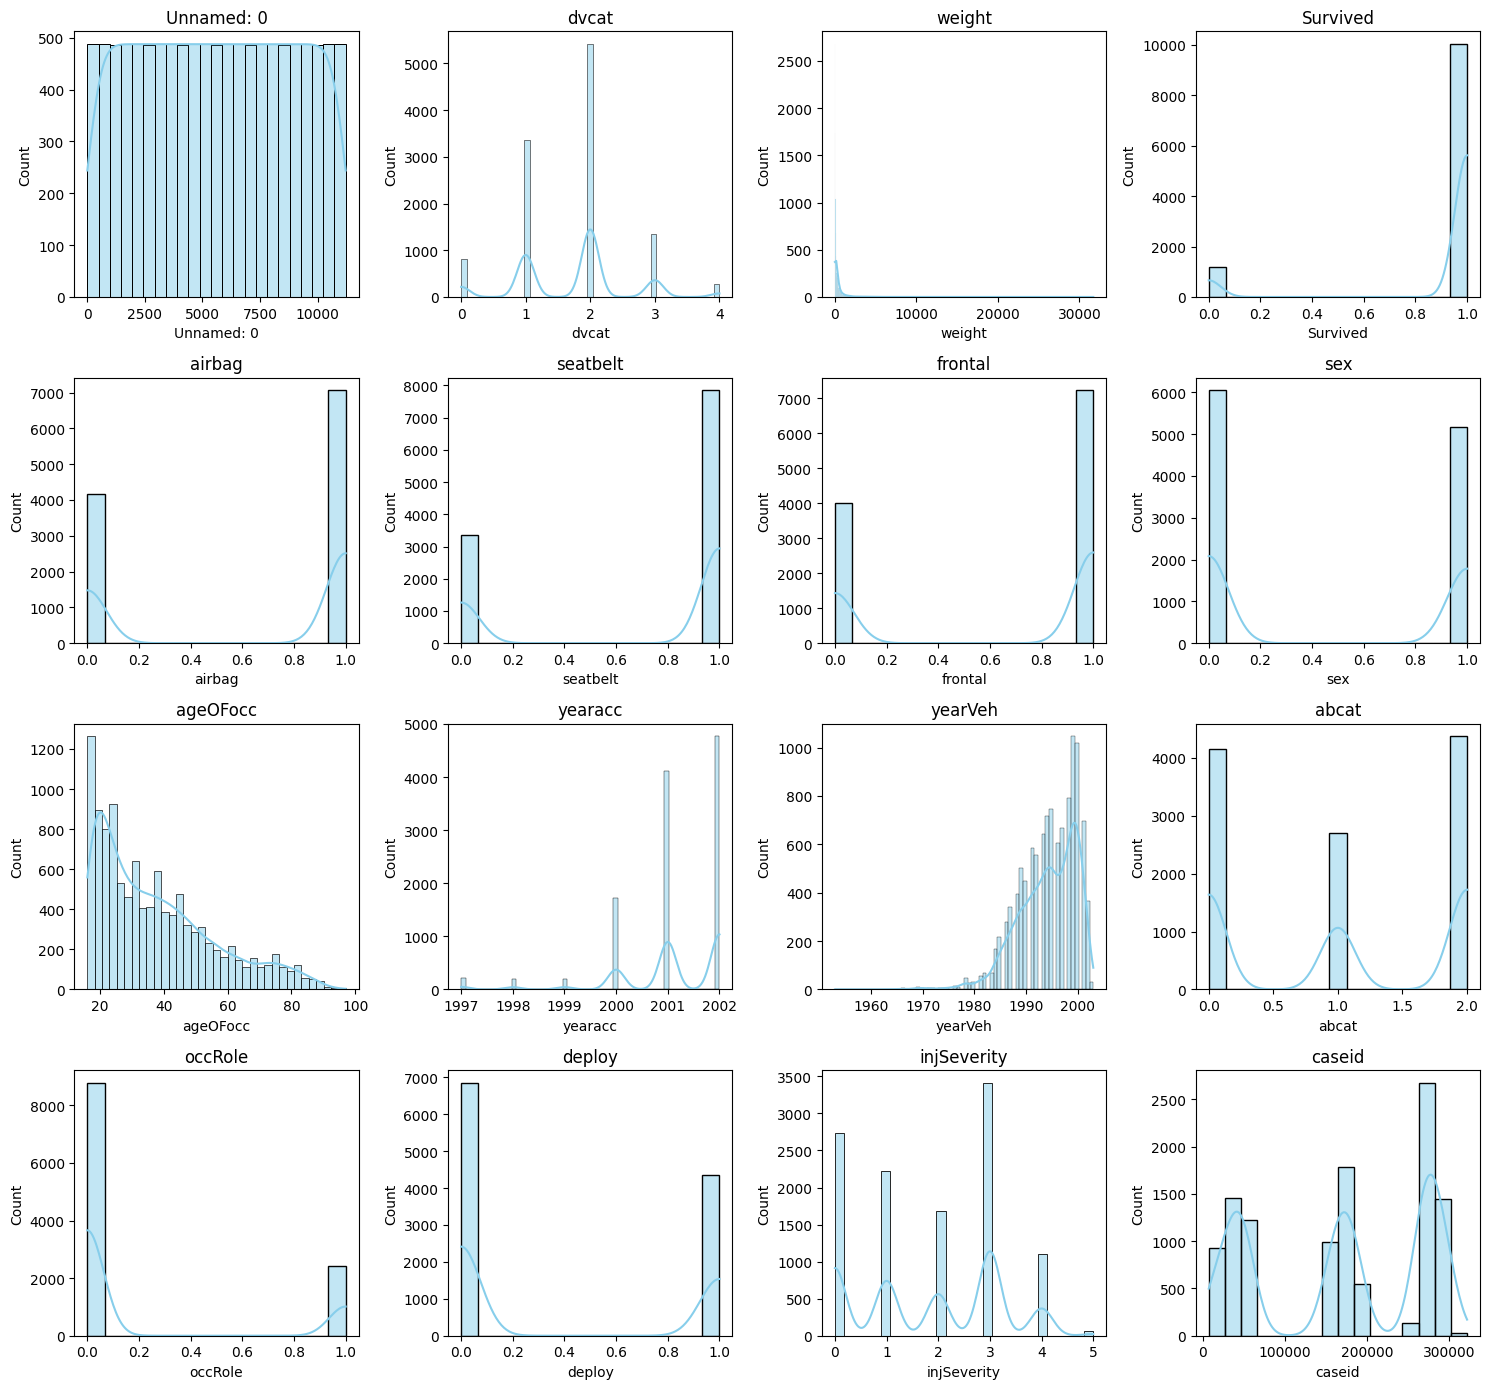

In [ ]:
## Creating histograms of all the columns to capture the distribution of each variable
plt.figure(figsize=(15, 14))
for i, col in enumerate(tt2.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(tt2[col], color='skyblue', kde = True)
    plt.title(col)
plt.tight_layout();

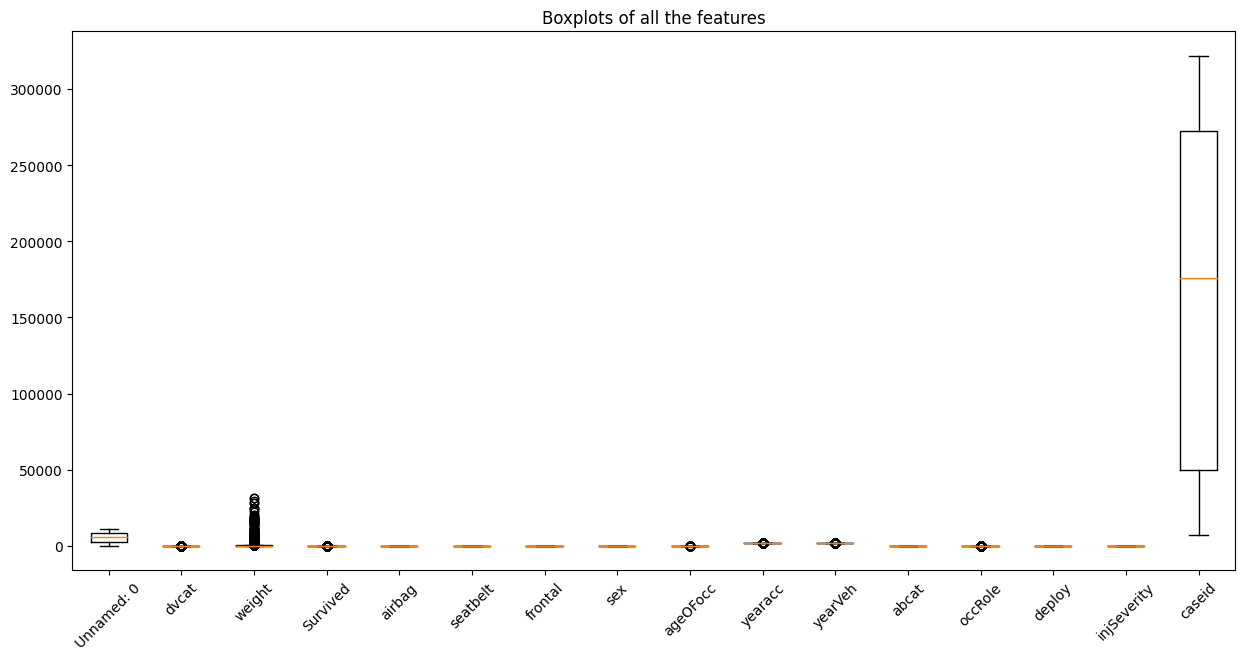

In [ ]:
## Boxplots of individual variables
plt.figure(figsize = (15,7))
plt.boxplot(tt2.values, labels = tt2.columns)
plt.title('Boxplots of all the features')
plt.xticks(rotation=45);

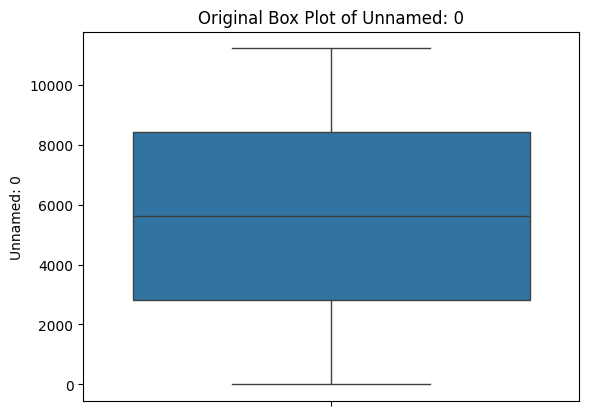

Threshold value for removing outliers in Unnamed: 0 : 16824.0


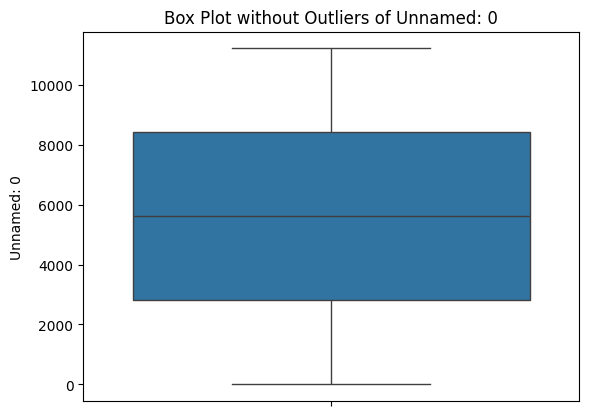

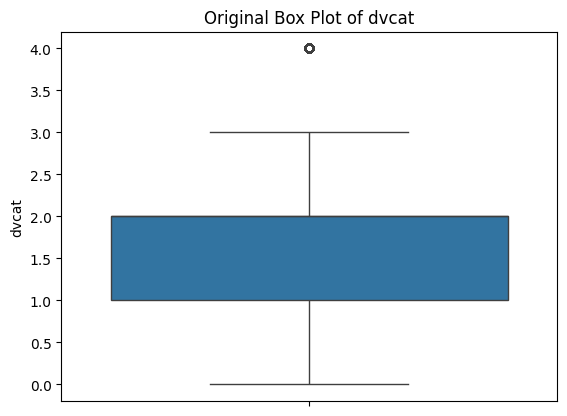

Threshold value for removing outliers in dvcat : 3.5


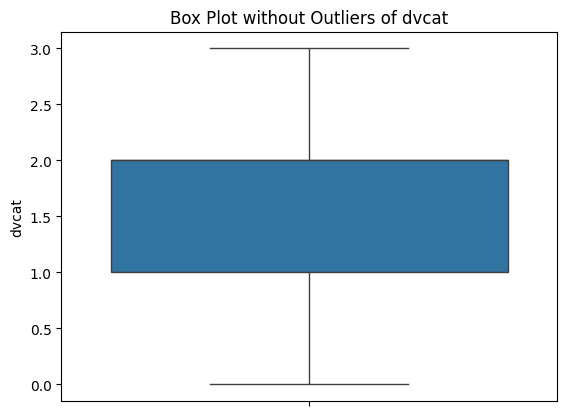

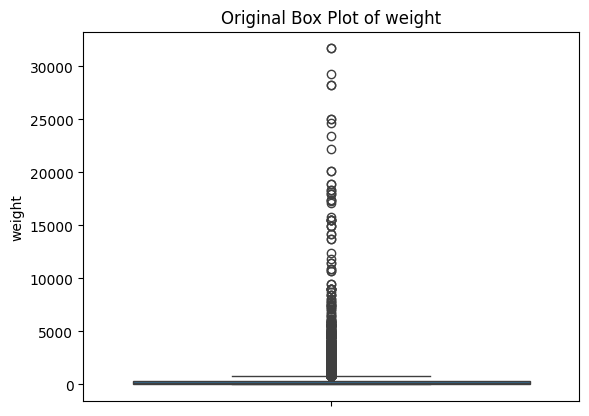

Threshold value for removing outliers in weight : 767.7019999951584


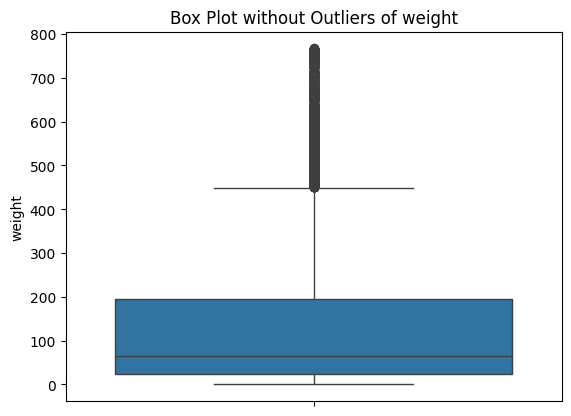

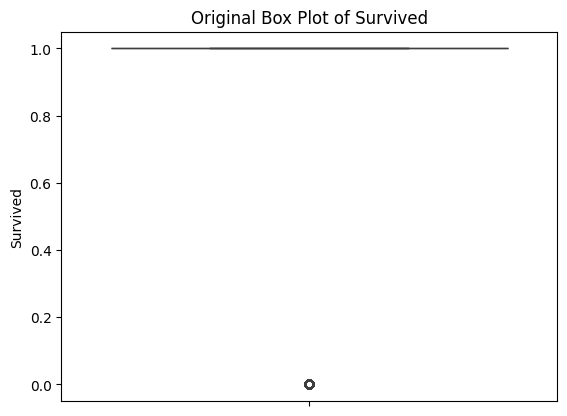

Threshold value for removing outliers in Survived : 1.0


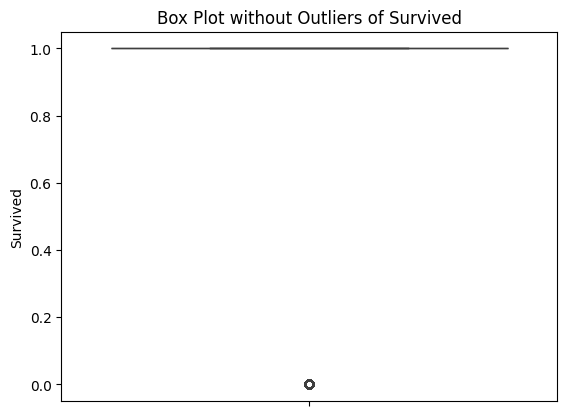

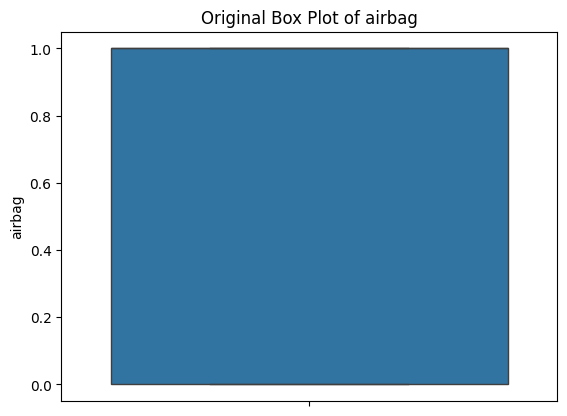

Threshold value for removing outliers in airbag : 2.5


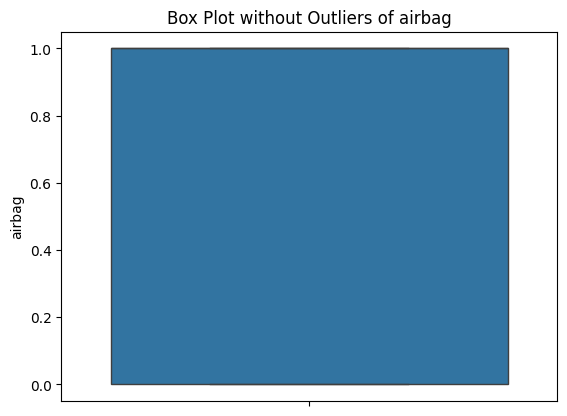

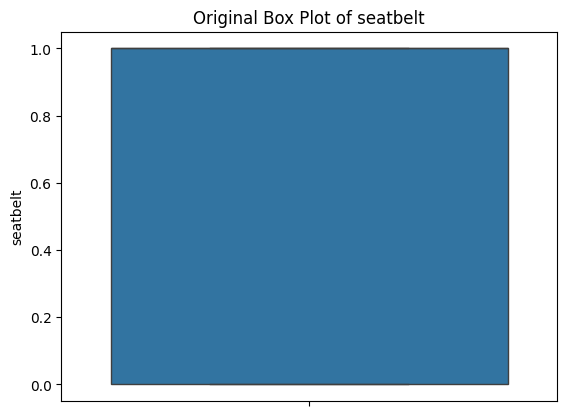

Threshold value for removing outliers in seatbelt : 2.5


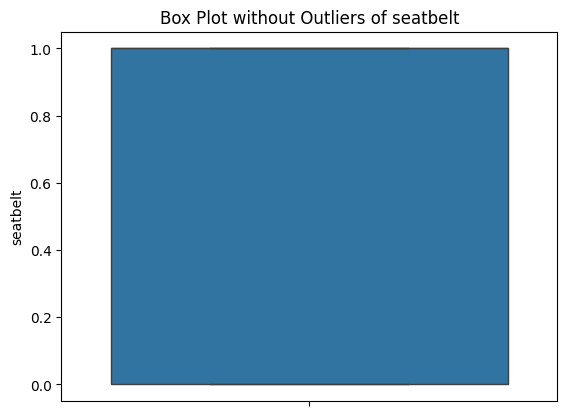

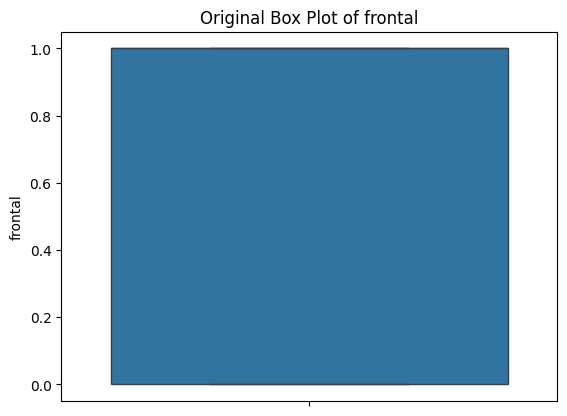

Threshold value for removing outliers in frontal : 2.5


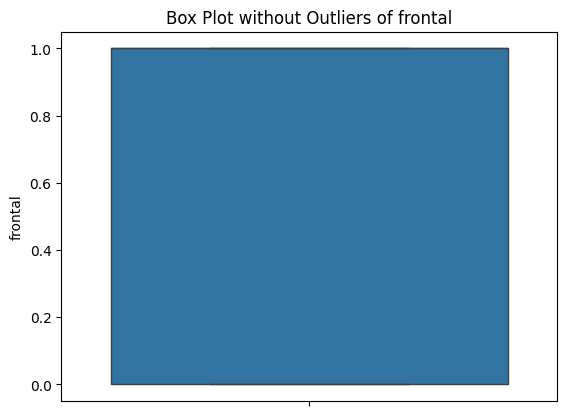

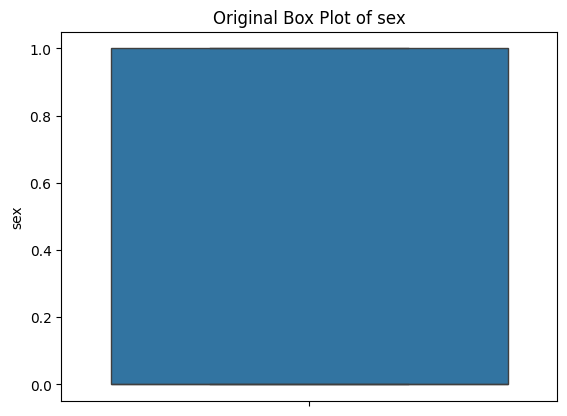

Threshold value for removing outliers in sex : 2.5


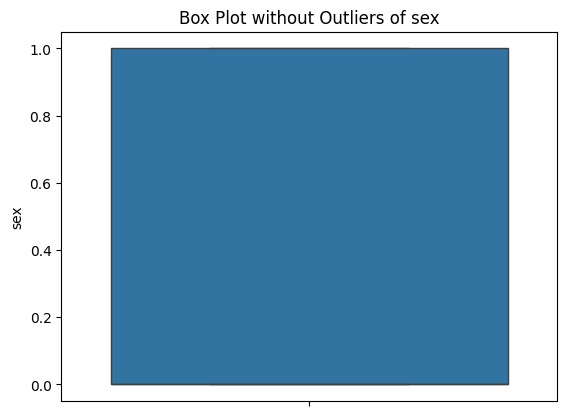

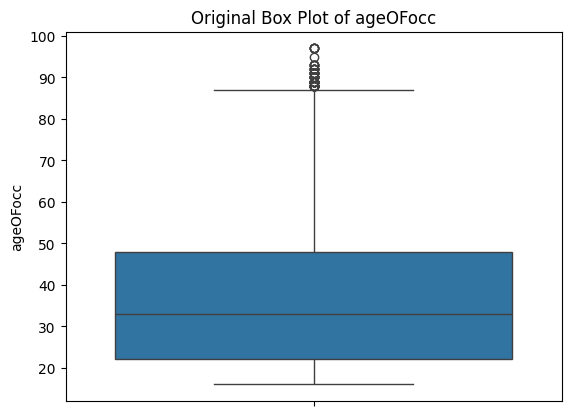

Threshold value for removing outliers in ageOFocc : 87.0


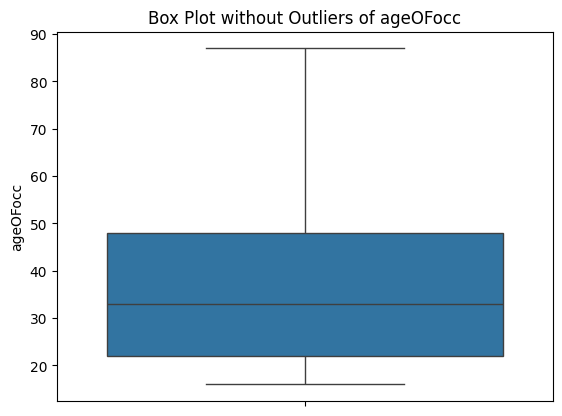

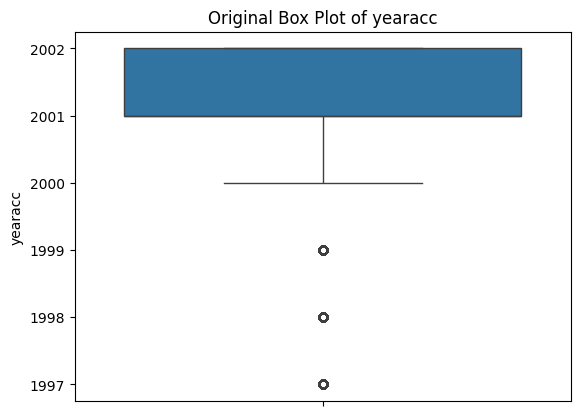

Threshold value for removing outliers in yearacc : 2003.5


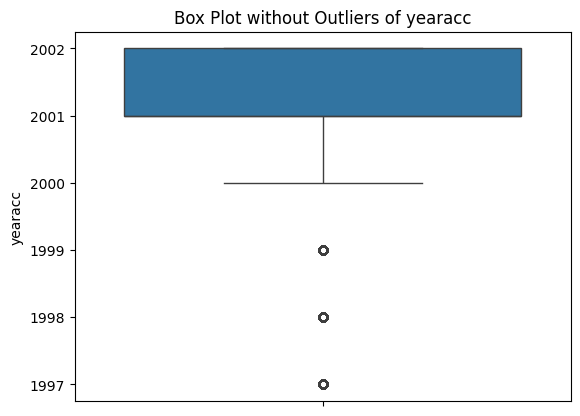

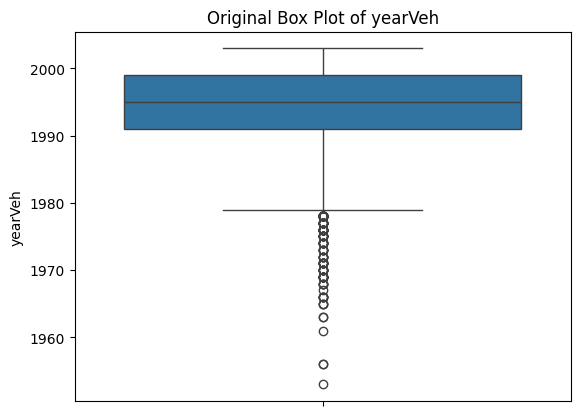

Threshold value for removing outliers in yearVeh : 2011.0


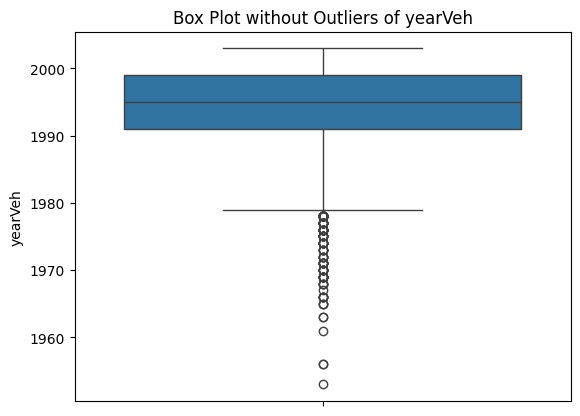

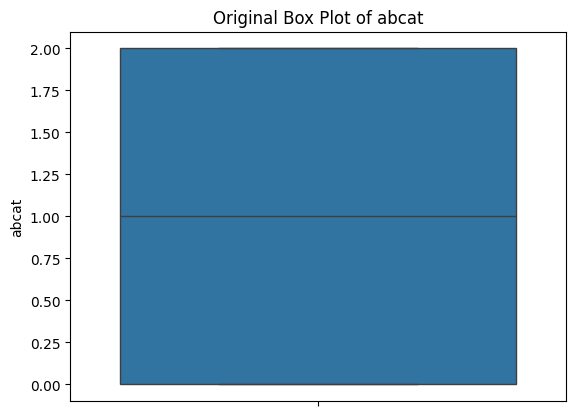

Threshold value for removing outliers in abcat : 5.0


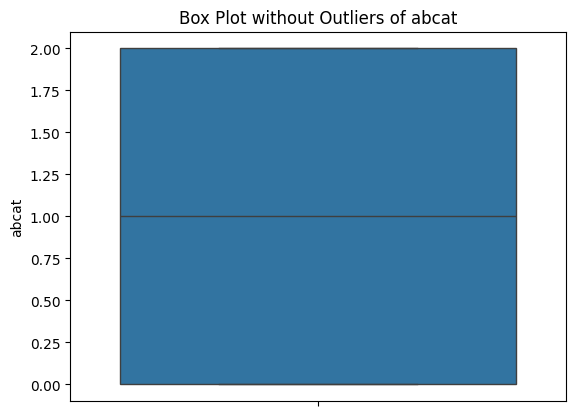

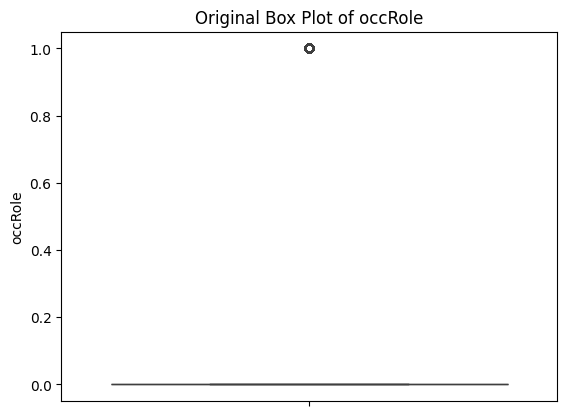

Threshold value for removing outliers in occRole : 0.0


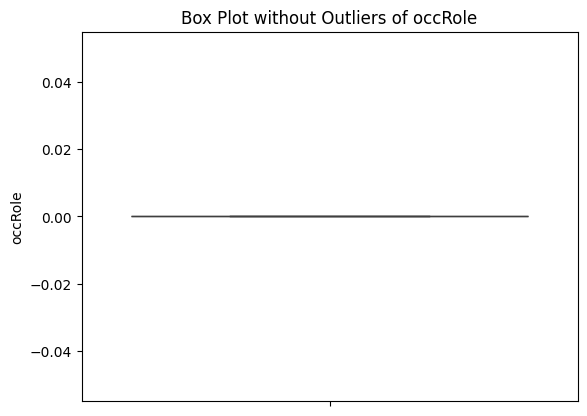

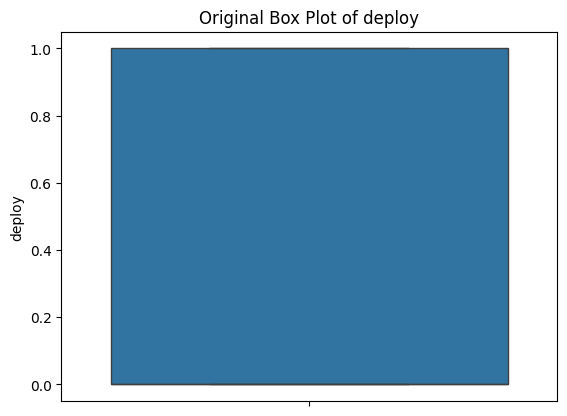

Threshold value for removing outliers in deploy : 2.5


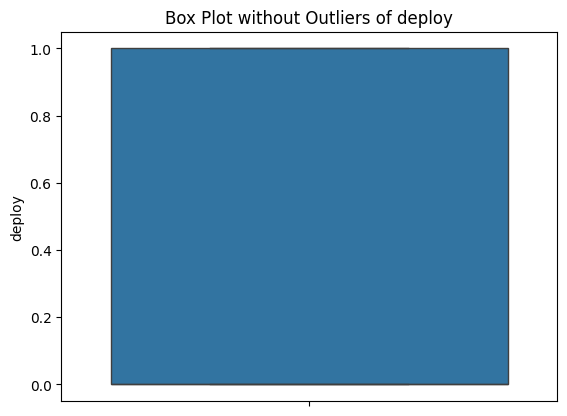

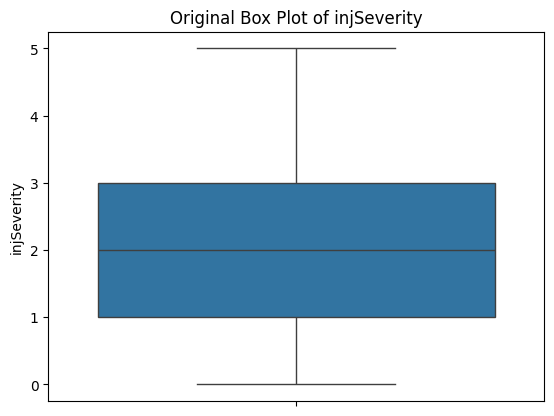

Threshold value for removing outliers in injSeverity : 6.0


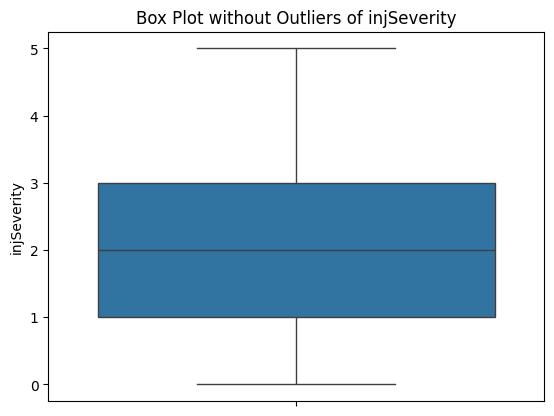

In [ ]:
def removal_box_plot(tt2, columns):
    for column in columns:
        sns.boxplot(tt2[column])
        plt.title(f'Original Box Plot of {column}')
        plt.show()

        Q1 = tt2[column].quantile(0.25)
        Q3 = tt2[column].quantile(0.75)
        IQR = Q3 - Q1

        threshold_value = Q3 + 1.5 * IQR  # Adjust multiplier as needed
        print("Threshold value for removing outliers in", column, ":", threshold_value)

        removed_outliers = tt2[tt2[column] <= threshold_value]

        sns.boxplot(removed_outliers[column])
        plt.title(f'Box Plot without Outliers of {column}')
        plt.show()

    tt2 = removed_outliers  # Update DataFrame after removing outliers from each column
    return removed_outliers

# Specify the list of columns from which you want to remove outliers
columns_to_remove_outliersnumeric_data = ['Unnamed: 0', 'dvcat','weight',	'Survived',	'airbag','seatbelt',	'frontal','sex','ageOFocc',	'yearacc',	'yearVeh',	'abcat',	'occRole'	,'deploy',	'injSeverity']

no_outliersnumeric_data = removal_box_plot(numeric_data, columns_to_remove_outliersnumeric_data)

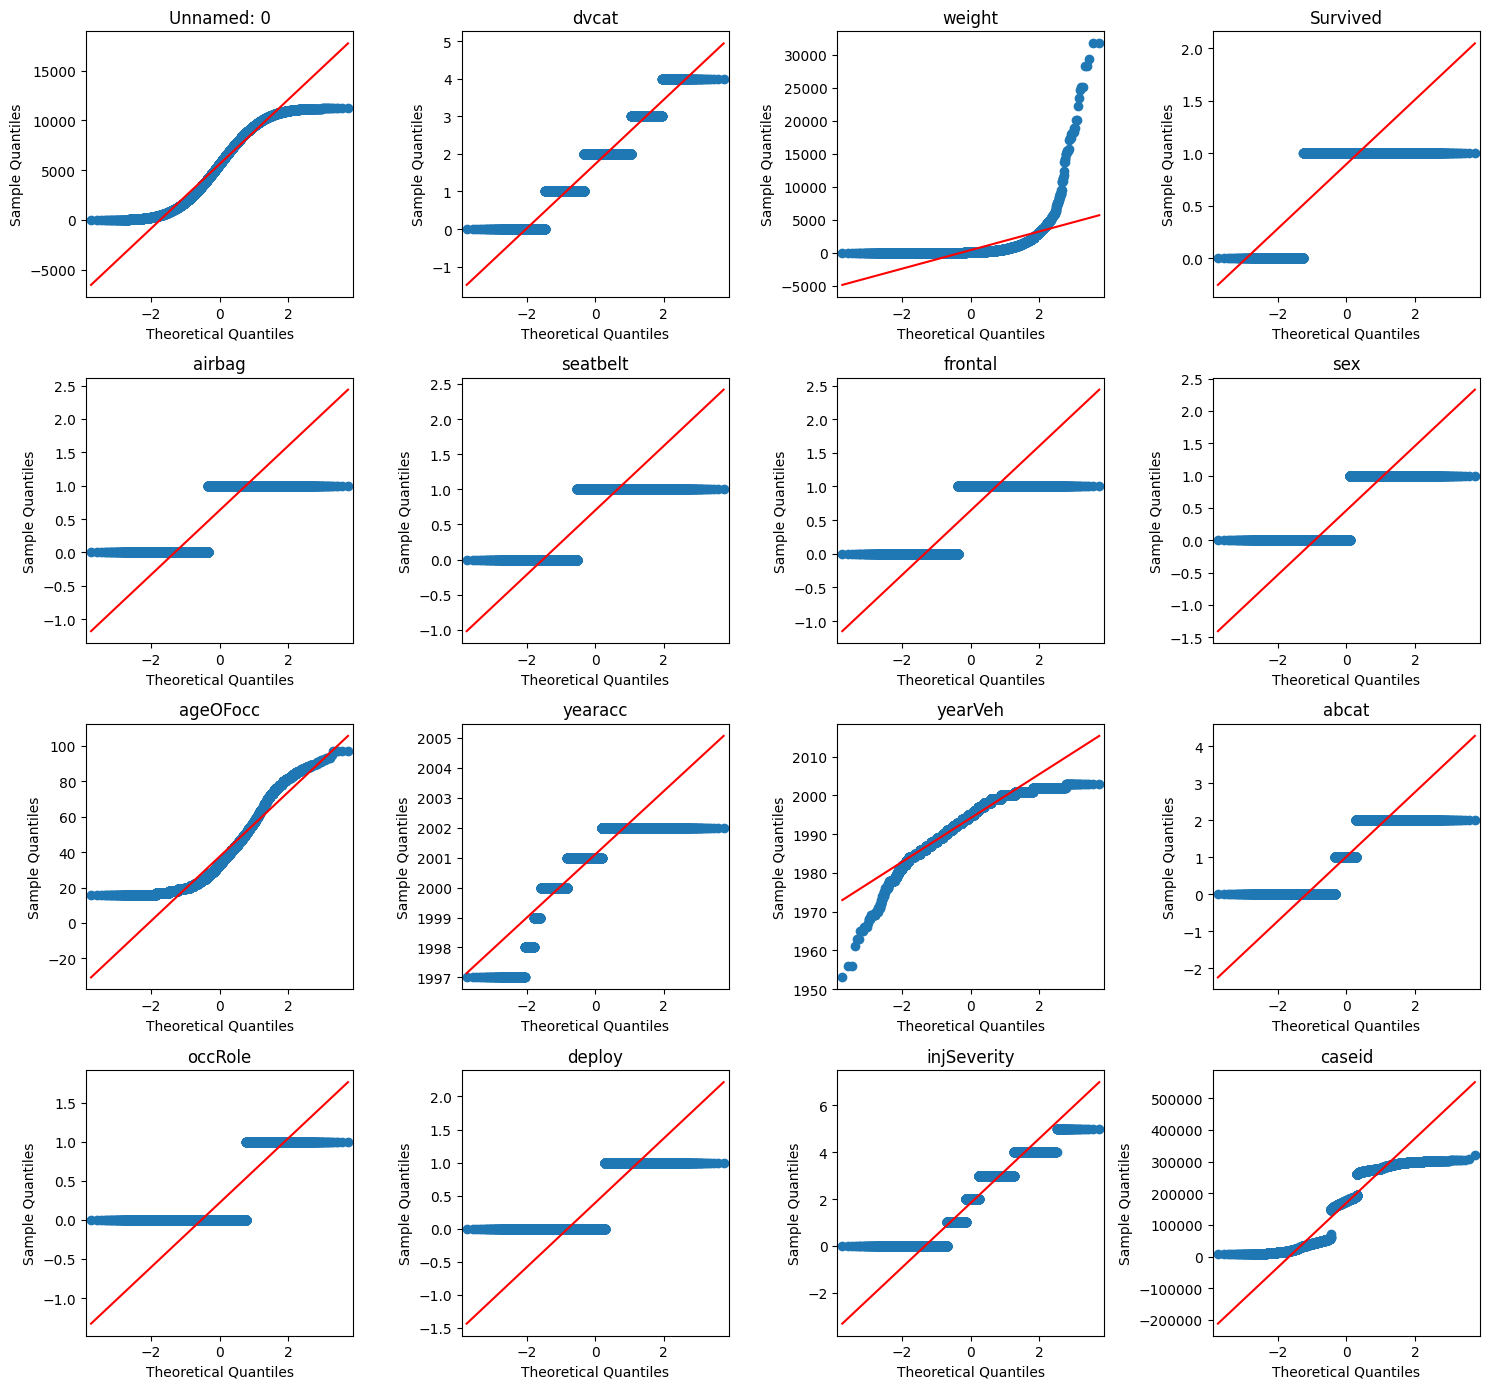

In [ ]:
## Q-Q plots
from statsmodels.api import qqplot
plt.figure(figsize=(15, 14))
for i, col in enumerate(tt2.columns):
    plt.subplot(4, 4, i+1)
    qqplot(tt2[col], line='s',ax=plt.gca())
    plt.title(col)
plt.tight_layout();

**Bivarate analysis**

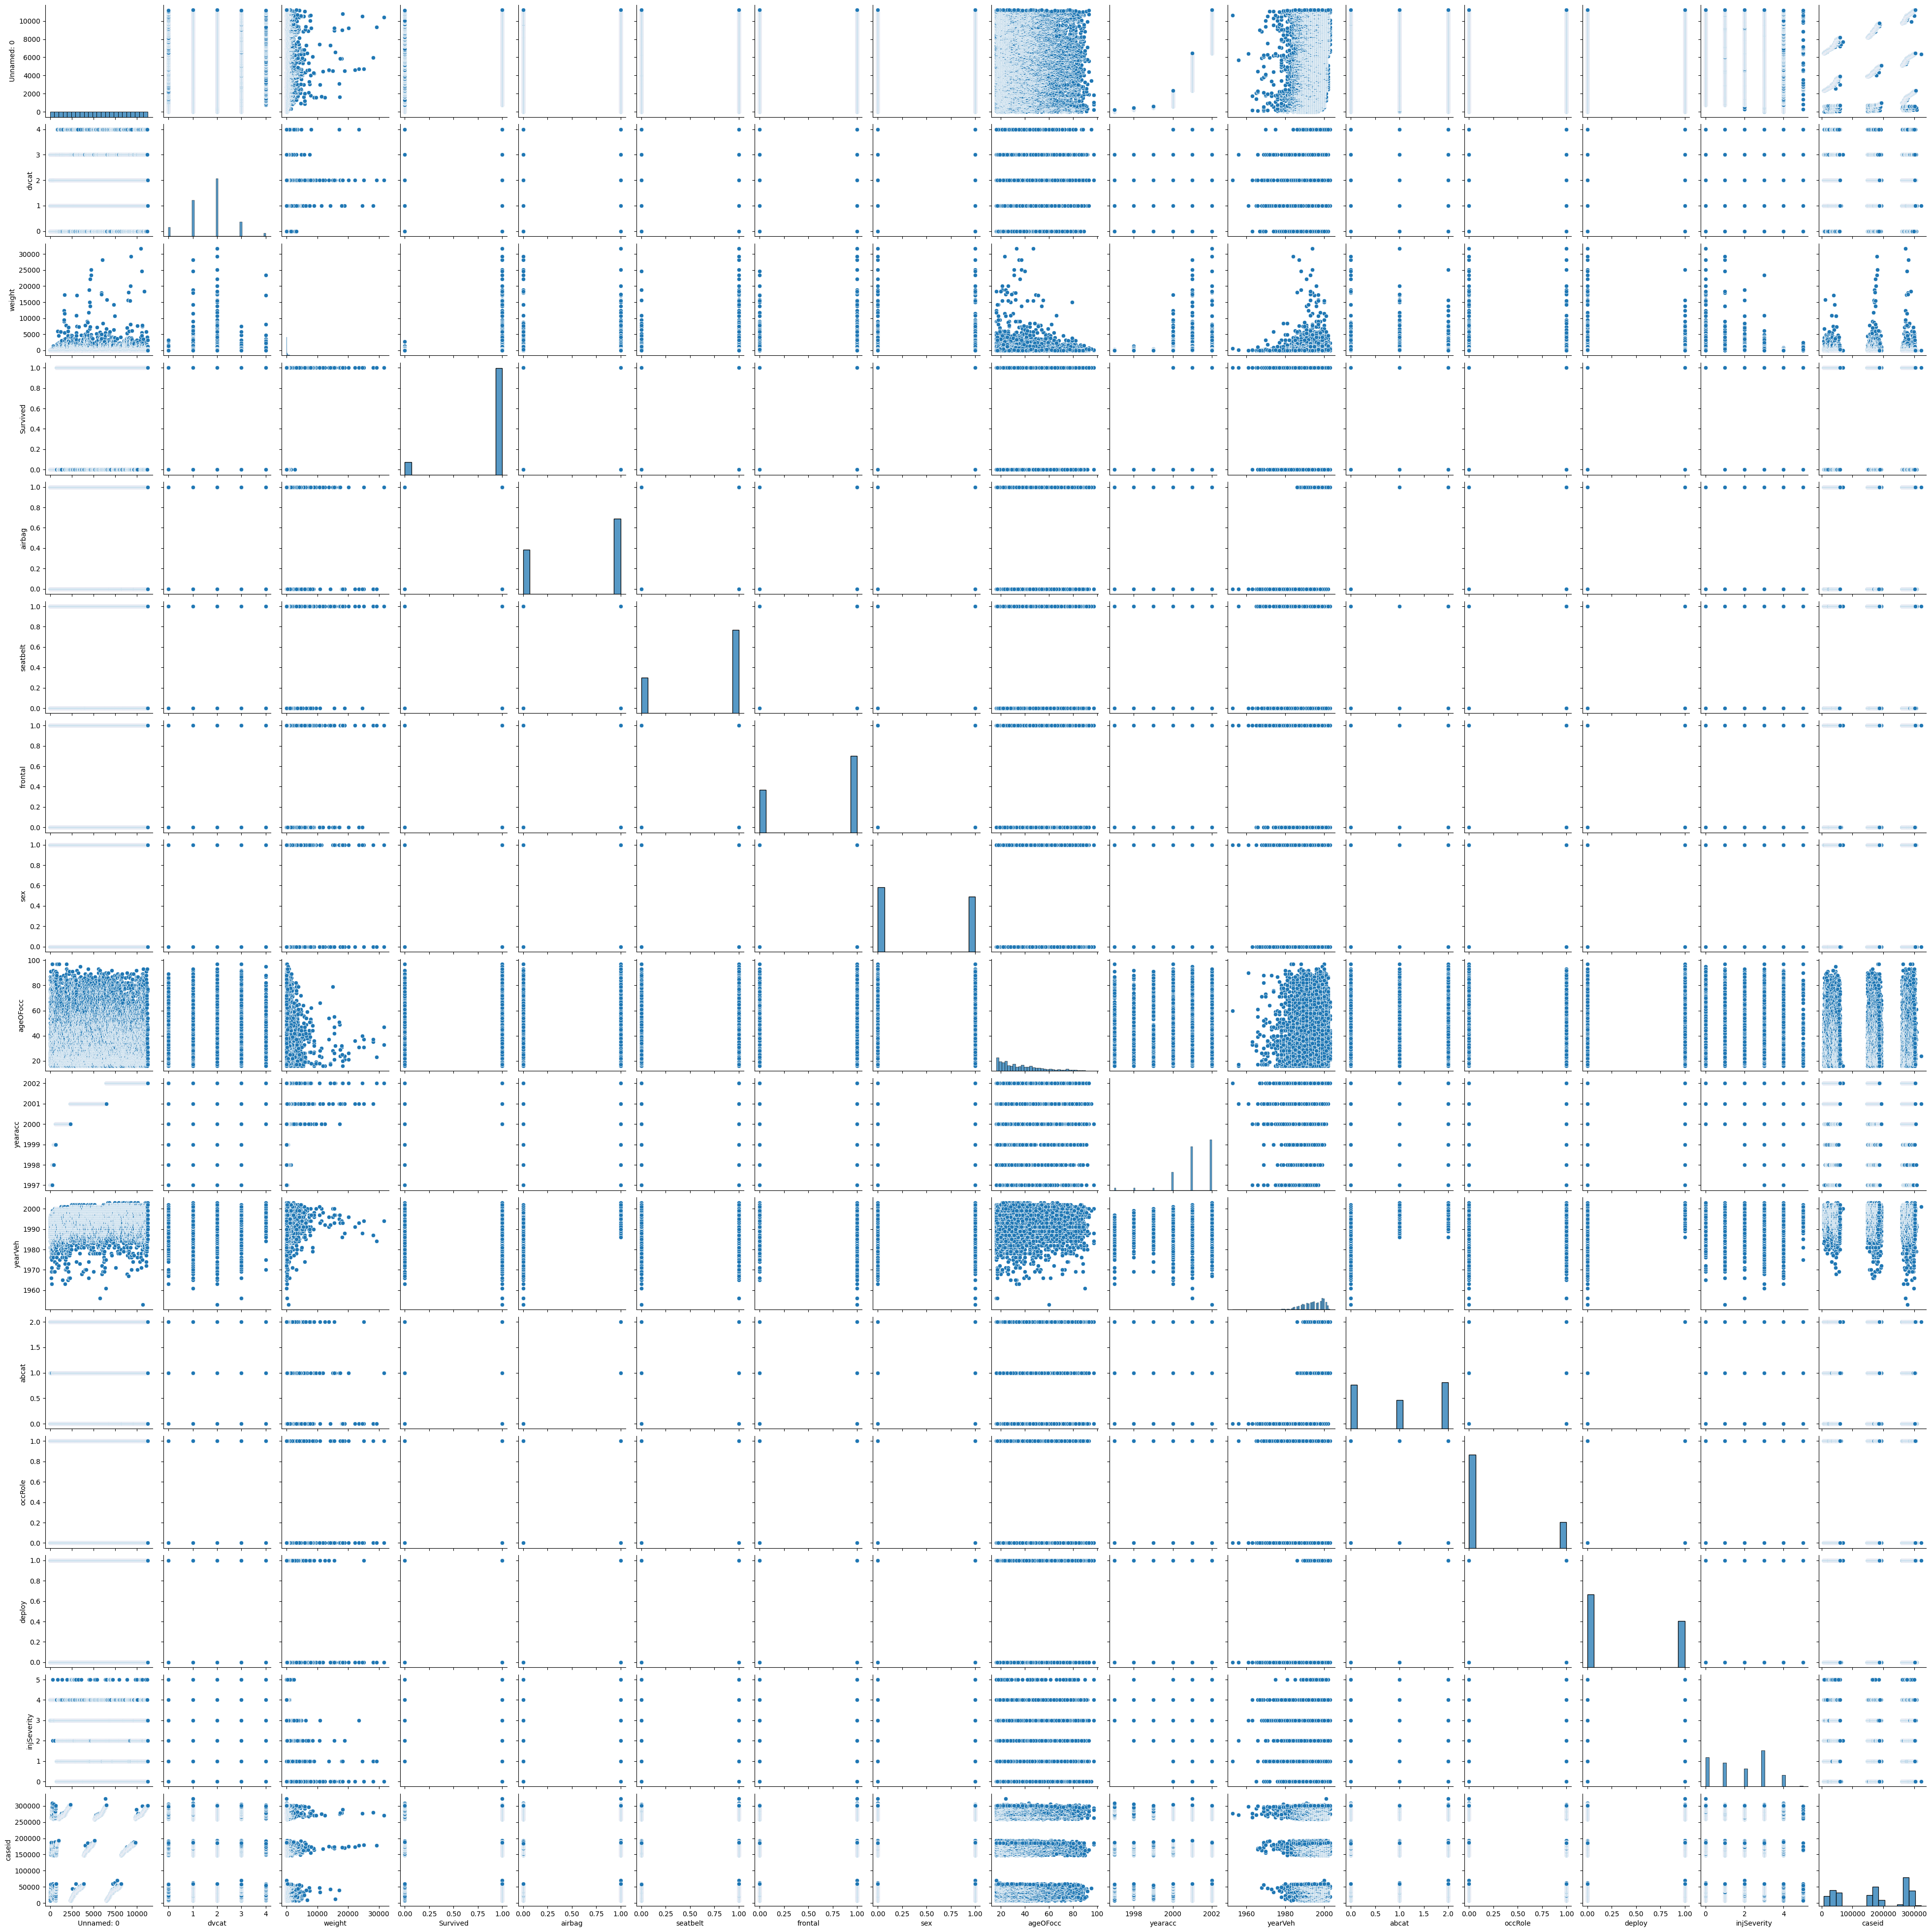

In [ ]:
## Scatter plot of the above variables
sns.pairplot(tt2);

In [ ]:
## Correlation Matrix
corr_matrix = tt2.corr()
corr_matrix

Unnamed: 0     dvcat    weight  Survived    airbag  seatbelt  \
Unnamed: 0     1.000000  0.050008  0.032443  0.332908  0.125035  0.098996   
dvcat          0.050008  1.000000  0.055414  0.156102  0.072501  0.080102   
weight         0.032443  0.055414  1.000000  0.091640 -0.003574  0.078739   
Survived       0.332908  0.156102  0.091640  1.000000  0.139679  0.206467   
airbag         0.125035  0.072501 -0.003574  0.139679  1.000000  0.157501   
seatbelt       0.098996  0.080102  0.078739  0.206467  0.157501  1.000000   
frontal        0.048826 -0.056229  0.000659  0.107990 -0.050272 -0.066590   
sex            0.014170  0.022005  0.006471  0.046499  0.092886  0.117071   
ageOFocc      -0.050093  0.008045 -0.040111 -0.135473  0.025109  0.066066   
yearacc        0.848152  0.086836  0.056892  0.549885  0.181478  0.149208   
yearVeh        0.181146  0.077701 -0.015226  0.165096  0.766181  0.180534   
abcat          0.105042  0.013399 -0.038795  0.107829  0.896724  0.111991   
occRole       -0.008381  0.004566 -0.000219 -0.023460 -0.086011 -0.047712   
deploy         0.063868 -0.047861 -0.065783  0.054346  0.611983  0.044132   
injSeverity   -0.170589 -0.172602 -0.220659 -0.517637 -0.124394 -0.283063   
caseid         0.129724 -0.000133 -0.007294  0.066350 -0.066045 -0.032893   

              frontal       sex  ageOFocc   yearacc   yearVeh     abcat  \
Unnamed: 0   0.048826  0.014170 -0.050093  0.848152  0.181146  0.105042   
dvcat       -0.056229  0.022005  0.008045  0.086836  0.077701  0.013399   
weight       0.000659  0.006471 -0.040111  0.056892 -0.015226 -0.038795   
Survived     0.107990  0.046499 -0.135473  0.549885  0.165096  0.107829   
airbag      -0.050272  0.092886  0.025109  0.181478  0.766181  0.896724   
seatbelt    -0.066590  0.117071  0.066066  0.149208  0.180534  0.111991   
frontal      1.000000 -0.055639 -0.048856  0.059768 -0.024267  0.117856   
sex         -0.055639  1.000000  0.063575  0.025957  0.097390  0.071708   
ageOFocc    -0.048856  0.063575  1.000000 -0.072271 -0.002070  0.008569   
yearacc      0.059768  0.025957 -0.072271  1.000000  0.247743  0.151650   
yearVeh     -0.024267  0.097390 -0.002070  0.247743  1.000000  0.677852   
abcat        0.117856  0.071708  0.008569  0.151650  0.677852  1.000000   
occRole     -0.033721  0.116228 -0.052485 -0.018217 -0.018416 -0.094860   
deploy       0.260388  0.036143 -0.009556  0.091252  0.452448  0.898811   
injSeverity -0.053709  0.021284  0.123495 -0.300495 -0.138475 -0.048724   
caseid       0.033590 -0.012509 -0.024547 -0.144704 -0.098922 -0.057429   

              occRole    deploy  injSeverity    caseid  
Unnamed: 0  -0.008381  0.063868    -0.170589  0.129724  
dvcat        0.004566 -0.047861    -0.172602 -0.000133  
weight      -0.000219 -0.065783    -0.220659 -0.007294  
Survived    -0.023460  0.054346    -0.517637  0.066350  
airbag      -0.086011  0.611983    -0.124394 -0.066045  
seatbelt    -0.047712  0.044132    -0.283063 -0.032893  
frontal     -0.033721  0.260388    -0.053709  0.033590  
sex          0.116228  0.036143     0.021284 -0.012509  
ageOFocc    -0.052485 -0.009556     0.123495 -0.024547  
yearacc     -0.018217  0.091252    -0.300495 -0.144704  
yearVeh     -0.018416  0.452448    -0.138475 -0.098922  
abcat       -0.094860  0.898811    -0.048724 -0.057429  
occRole      1.000000 -0.084323     0.018918  0.015405  
deploy      -0.084323  1.000000     0.036133 -0.037211  
injSeverity  0.018918  0.036133     1.000000  0.023658  
caseid       0.015405 -0.037211     0.023658  1.000000

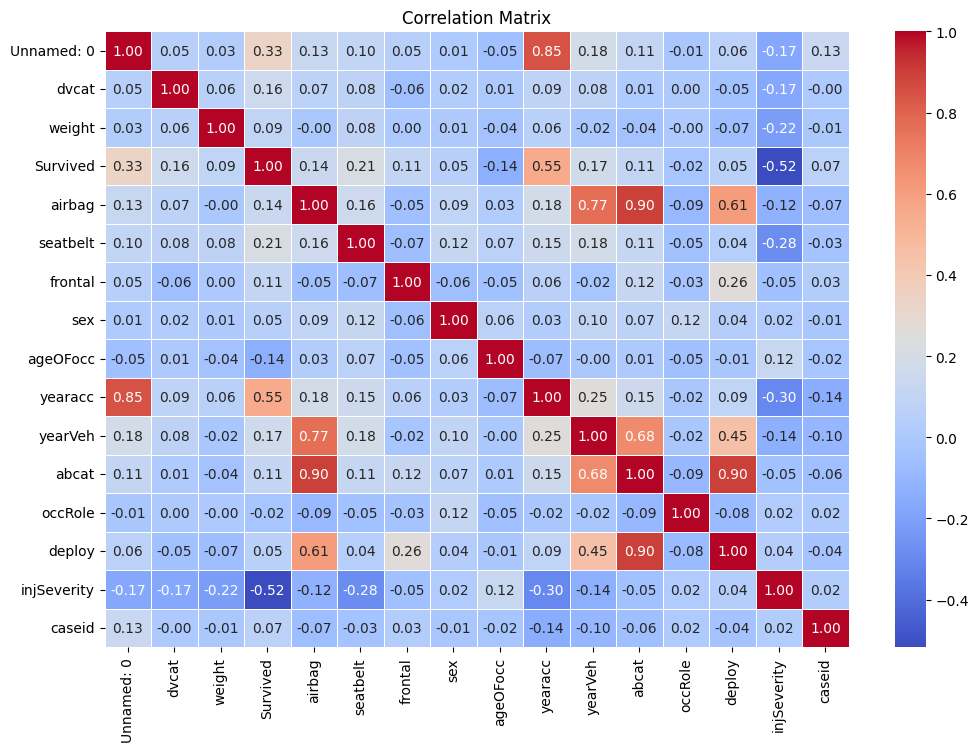

In [ ]:
## Heatmap of the above correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix');

In [ ]:
y9 = tt2.iloc[:, 3]

In [ ]:
X9 = tt2.drop(tt2.columns[3], axis=1)

In [ ]:
X11_train, X11_test, y11_train, y11_test = train_test_split(X9, y9, test_size=0.3)

In [ ]:
X11_train

Unnamed: 0  dvcat   weight  airbag  seatbelt  frontal  sex  ageOFocc  \
1333        1333      2  414.364       1         1        1    1        23   
2946        2946      2  118.292       1         1        1    0        17   
7887        7887      1   24.443       0         1        1    0        16   
186          186      1   45.249       0         0        1    0        36   
5707        5707      0  122.254       0         1        1    0        21   
...          ...    ...      ...     ...       ...      ...  ...       ...   
5345        5345      2   64.898       1         1        0    1        57   
5484        5484      2  582.638       0         0        1    1        29   
774          774      1   27.682       1         1        0    1        21   
2124        2124      3   22.165       1         0        1    1        18   
2935        2935      1  629.513       0         1        1    0        23   

      yearacc  yearVeh  abcat  occRole  deploy  injSeverity  caseid  
1333     2000   1994.0      2        0       1          2.0  267301  
2946     2001   1999.0      2        0       1          2.0   40261  
7887     2002   1991.0      0        1       0          2.0   51542  
186      1997   1983.0      0        0       0          4.0  274741  
5707     2001   1984.0      0        0       0          3.0  270064  
...       ...      ...    ...      ...     ...          ...     ...  
5345     2001   1999.0      1        0       0          3.0  265742  
5484     2001   1988.0      0        0       0          0.0  273062  
774      2000   1997.0      2        0       1          3.0  181741  
2124     2000   1995.0      2        1       1          3.0  296341  
2935     2001   1995.0      0        0       0          0.0   39721  

[7851 rows x 15 columns]

In [ ]:
X11_test

Unnamed: 0  dvcat   weight  airbag  seatbelt  frontal  sex  ageOFocc  \
1986         1986      2   83.070       0         0        1    1        42   
9737         9737      2  247.281       0         1        0    1        18   
2409         2409      2  108.487       0         0        1    0        25   
8811         8811      1   36.032       0         1        1    0        51   
8572         8572      2  216.383       1         1        0    0        51   
...           ...    ...      ...     ...       ...      ...  ...       ...   
10735       10735      2   49.063       1         1        1    0        21   
7807         7807      1   24.268       0         1        1    1        25   
2583         2583      1   87.565       1         1        1    0        30   
7329         7329      2   31.407       1         1        1    1        16   
7492         7492      4  116.308       1         1        0    0        20   

       yearacc  yearVeh  abcat  occRole  deploy  injSeverity  caseid  
1986      2000   1987.0      0        1       0          2.0  290822  
9737      2002   1993.0      0        0       0          1.0  184261  
2409      2001   1987.0      0        0       0          3.0   10441  
8811      2002   1987.0      0        0       0          1.0  172741  
8572      2002   1999.0      2        0       1          2.0  160202  
...        ...      ...    ...      ...     ...          ...     ...  
10735     2002   1999.0      2        0       1          2.0  282962  
7807      2002   1995.0      0        1       0          1.0   48121  
2583      2001   1995.0      2        0       1          1.0   19322  
7329      2002   2001.0      2        0       1          3.0   42481  
7492      2002   1999.0      1        0       0          0.0   42541  

[3366 rows x 15 columns]

In [ ]:
 y11_train

1333    1
2946    1
7887    1
186     0
5707    1
       ..
5345    1
5484    1
774     1
2124    1
2935    1
Name: Survived, Length: 7851, dtype: int64

In [ ]:
y11_test

1986     1
9737     1
2409     1
8811     1
8572     1
        ..
10735    1
7807     1
2583     1
7329     1
7492     1
Name: Survived, Length: 3366, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X11_train, y11_train)

# Predict on the test set
y11_pred_log_reg = log_reg.predict(X11_test)

# Evaluate the Logistic Regression model
accuracy_log_reg = accuracy_score(y11_test, y11_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y11_test, y11_pred_log_reg)
report_log_reg = classification_report(y11_test, y11_pred_log_reg)

print("Logistic Regression Accuracy:", accuracy_log_reg)
print("Confusion Matrix:\n", conf_matrix_log_reg)
print("Classification Report:\n", report_log_reg)

Logistic Regression Accuracy: 0.9233511586452763
Confusion Matrix:
 [[ 109  231]
 [  27 2999]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.32      0.46       340
           1       0.93      0.99      0.96      3026

    accuracy                           0.92      3366
   macro avg       0.86      0.66      0.71      3366
weighted avg       0.92      0.92      0.91      3366



In [ ]:
# Initialize and train LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X11_train, y11_train)

# Predict on the test set
y11_pred_lda = lda.predict(X11_test)

# Evaluate the LDA model
accuracy_lda = accuracy_score(y11_test, y11_pred_lda)
conf_matrix_lda = confusion_matrix(y11_test, y11_pred_lda)
report_lda = classification_report(y11_test, y11_pred_lda)

print("LDA Accuracy:", accuracy_lda)
print("Confusion Matrix:\n", conf_matrix_lda)
print("Classification Report:\n", report_lda)


LDA Accuracy: 0.9521687462863934
Confusion Matrix:
 [[ 180  160]
 [   1 3025]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.53      0.69       340
           1       0.95      1.00      0.97      3026

    accuracy                           0.95      3366
   macro avg       0.97      0.76      0.83      3366
weighted avg       0.95      0.95      0.95      3366



## **2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Compare both the models and write inferences, which model is best/optimized.**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Evaluate on train set for Logistic Regression
y_train_pred_log_reg = log_reg.predict(X11_train)
accuracy_train_log_reg = accuracy_score(y11_train, y_train_pred_log_reg)
conf_matrix_train_log_reg = confusion_matrix(y11_train, y_train_pred_log_reg)
report_train_log_reg = classification_report(y11_train, y_train_pred_log_reg)

# Evaluate on test set for Logistic Regression
accuracy_test_log_reg = accuracy_score(y11_test, y11_pred_log_reg)
conf_matrix_test_log_reg = confusion_matrix(y11_test, y11_pred_log_reg)
report_test_log_reg = classification_report(y11_test, y11_pred_log_reg)

# Evaluate on train set for LDA
y_train_pred_lda = lda.predict(X11_train)
accuracy_train_lda = accuracy_score(y11_train, y_train_pred_lda)
conf_matrix_train_lda = confusion_matrix(y11_train, y_train_pred_lda)
report_train_lda = classification_report(y11_train, y_train_pred_lda)

# Evaluate on test set for LDA
accuracy_test_lda = accuracy_score(y11_test, y11_pred_lda)
conf_matrix_test_lda = confusion_matrix(y11_test, y11_pred_lda)
report_test_lda = classification_report(y11_test, y11_pred_lda)

# Print performance metrics for Logistic Regression
print("Logistic Regression - Train Accuracy:", accuracy_train_log_reg)
print("Logistic Regression - Train Confusion Matrix:\n", conf_matrix_train_log_reg)
print("Logistic Regression - Train Classification Report:\n", report_train_log_reg)
print("Logistic Regression - Test Accuracy:", accuracy_test_log_reg)
print("Logistic Regression - Test Confusion Matrix:\n", conf_matrix_test_log_reg)
print("Logistic Regression - Test Classification Report:\n", report_test_log_reg)

# Print performance metrics for LDA
print("LDA - Train Accuracy:", accuracy_train_lda)
print("LDA - Train Confusion Matrix:\n", conf_matrix_train_lda)
print("LDA - Train Classification Report:\n", report_train_lda)
print("LDA - Test Accuracy:", accuracy_test_lda)
print("LDA - Test Confusion Matrix:\n", conf_matrix_test_lda)
print("LDA - Test Classification Report:\n", report_test_lda)


Logistic Regression - Train Accuracy: 0.9258693160106993
Logistic Regression - Train Confusion Matrix:
 [[ 295  545]
 [  37 6974]]
Logistic Regression - Train Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.35      0.50       840
           1       0.93      0.99      0.96      7011

    accuracy                           0.93      7851
   macro avg       0.91      0.67      0.73      7851
weighted avg       0.92      0.93      0.91      7851

Logistic Regression - Test Accuracy: 0.9233511586452763
Logistic Regression - Test Confusion Matrix:
 [[ 109  231]
 [  27 2999]]
Logistic Regression - Test Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.32      0.46       340
           1       0.93      0.99      0.96      3026

    accuracy                           0.92      3366
   macro avg       0.86      0.66      0.71      3366
weighted avg       0.92      0.92     

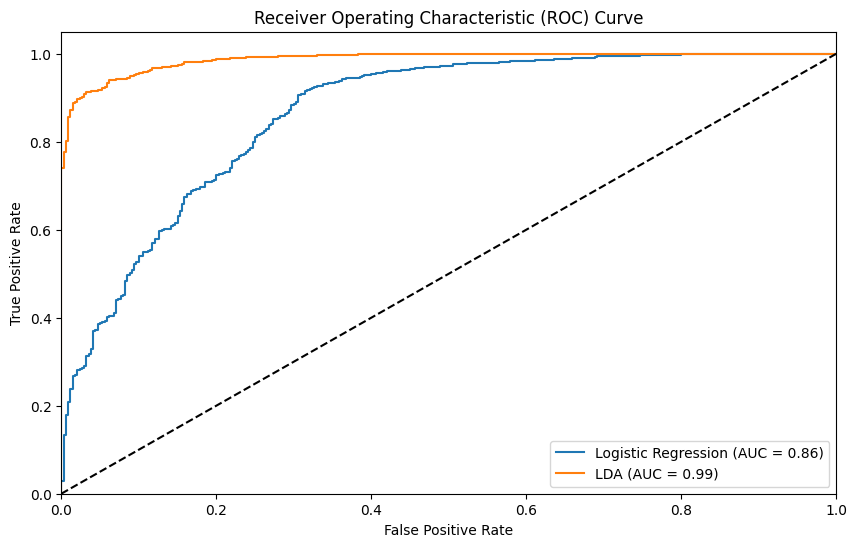

Logistic Regression - ROC_AUC Score: 0.864922631312935
LDA - ROC_AUC Score: 0.987015473737413


In [ ]:
# Calculate ROC and AUC for Logistic Regression
y_pred_prob_log_reg = log_reg.predict_proba(X11_test)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y11_test, y_pred_prob_log_reg)
roc_auc_log_reg = roc_auc_score(y11_test, y_pred_prob_log_reg)

# Calculate ROC and AUC for LDA
y_pred_prob_lda = lda.predict_proba(X11_test)[:, 1]
fpr_lda, tpr_lda, _ = roc_curve(y11_test, y_pred_prob_lda)
roc_auc_lda = roc_auc_score(y11_test, y_pred_prob_lda)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_lda, tpr_lda, label=f'LDA (AUC = {roc_auc_lda:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Logistic Regression - ROC_AUC Score:", roc_auc_log_reg)
print("LDA - ROC_AUC Score:", roc_auc_lda)


## **2.4 Inference: Based on these predictions, what are the insights and recommendations.**



1.	Model Comparison:
o	Both models perform well, but LDA shows slightly higher accuracy on both training (0.95) and test (0.95) datasets compared to Logistic Regression (0.93 on training, 0.92 on test).
o	LDA has a perfect recall for class 1 (survivors) on both training and test datasets, indicating it correctly identifies all actual survivors.
o	Logistic Regression shows lower recall for class 0 (non-survivors), particularly on the test set (0.32), suggesting it misses a significant number of non-survivors.
2.	Class Imbalance:
o	The dataset is imbalanced with a much higher number of survivors (class 1) compared to non-survivors (class 0). This is evident from the support values in the classification reports.
o	LDA seems to handle the class imbalance better than Logistic Regression, especially in terms of recall for class 0.
3.	Precision vs. Recall:
o	Logistic Regression has higher precision for class 0 on the test set (0.80) compared to LDA (0.53), meaning it has fewer false positives among predicted non-survivors.
o	However, LDA has higher recall for class 0 on the test set (0.53) compared to Logistic Regression (0.32), indicating it correctly identifies more actual non-survivors.
4.	Generalization:
o	Both models generalize well from training to test datasets, with minimal drop in accuracy, indicating they are not overfitting.
Recommendations:
1.	Model Selection:
o	Given the higher recall for class 0 (non-survivors), LDA may be preferable if the goal is to minimize false negatives (i.e., correctly identify as many non-survivors as possible).
o	If precision for class 0 is more critical (i.e., minimizing false positives among non-survivors), Logistic Regression might be more suitable.
2.	Address Class Imbalance:
o	Consider using techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset or applying class weights to improve the model's performance on the minority class (non-survivors).
3.	Model Refinement:
o	Further tune hyperparameters for both models to see if performance can be enhanced.
o	Explore other models, such as Random Forest or Gradient Boosting, which might handle class imbalance more effectively.
4.	Feature Engineering:
o	Investigate the importance of features and consider adding or removing features to improve model performance.
5.	Cross-validation:
o	Perform k-fold cross-validation to ensure the robustness and stability of the models’ performance metrics.

